In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/sw/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")
/sw/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/sw/lib/python2.7/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/latin_hypercube/')

In [5]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = np.load('earm_mtdreamzs_3chain_uniform_lhc_gammalevels_25000burnin_fit_'+str(trace)+'1_sampled_params_chain_0.npy')
    #for cont in range(2, 15):
    #    old = traces[trace]
    #    traces[trace] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_sampled_params_chain_0.npy')])
    traces[trace] = [traces[trace]]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamzs_3chain_uniform_lhc_gammalevels_25000burnin_fit_'+str(trace)+'1_sampled_params_chain_'+str(chain)+'.npy'))
    #    for cont in range(2, 15):
    #        old = traces[trace][chain]
    #        traces[trace][chain] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_sampled_params_chain_'+str(chain)+'.npy')])

In [6]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = np.load('earm_mtdreamzs_3chain_uniform_lhc_gammalevels_25000burnin_fit_'+str(trace)+'1_logps_chain_0.npy')
    #for cont in range(2, 11):
    #    old = logps[trace]
    #    logps[trace] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_logps_chain_0.npy')])
    logps[trace] = [logps[trace]]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamzs_3chain_uniform_lhc_gammalevels_25000burnin_fit_'+str(trace)+'1_logps_chain_'+str(chain)+'.npy'))
        #for cont in range(2, 11):
        #    old = logps[trace][chain]
        #    logps[trace][chain] = np.concatenate([old, np.load('earm_mtdreamzs_3chain_uniform_gammalevels_25000burnin_fit_'+str(trace)+str(cont)+'_logps_chain_'+str(chain)+'.npy')])

In [7]:
traces['a'][0].shape

(200000, 105)

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  46  of  105  parameters.
Percent of parameters with GR below 1.2:  43.8095238095
Number of parameters with GR below 1.1:  25  of  105  parameters.
Percent of parameters with GR below 1.1:  23.8095238095


[46, 43.80952380952381, 25, 23.809523809523807]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  58  of  105  parameters.
Percent of parameters with GR below 1.2:  55.2380952381
Number of parameters with GR below 1.1:  33  of  105  parameters.
Percent of parameters with GR below 1.1:  31.4285714286


[58, 55.23809523809524, 33, 31.428571428571427]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  84  of  105  parameters.
Percent of parameters with GR below 1.2:  80.0
Number of parameters with GR below 1.1:  57  of  105  parameters.
Percent of parameters with GR below 1.1:  54.2857142857


[84, 80.0, 57, 54.285714285714285]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  69  of  105  parameters.
Percent of parameters with GR below 1.2:  65.7142857143
Number of parameters with GR below 1.1:  37  of  105  parameters.
Percent of parameters with GR below 1.1:  35.2380952381


[69, 65.71428571428571, 37, 35.23809523809524]

200000
3
200000


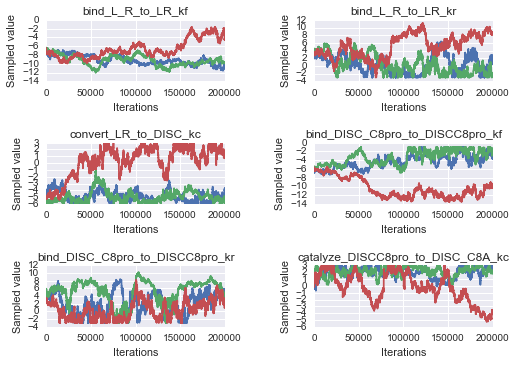

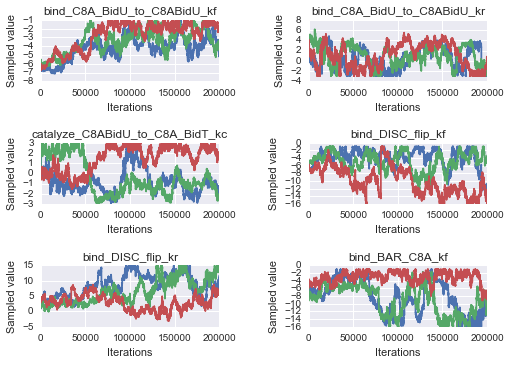

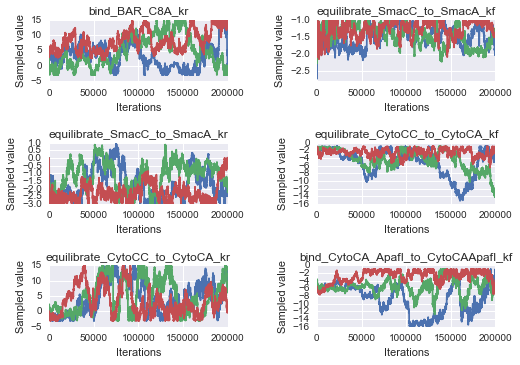

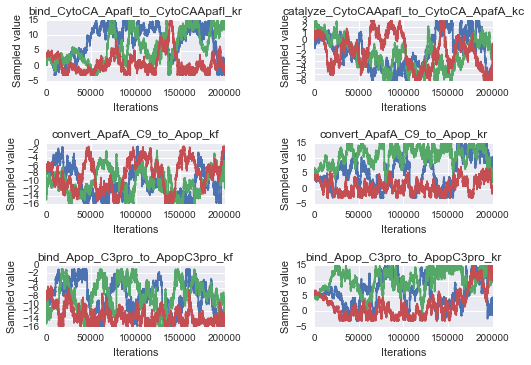

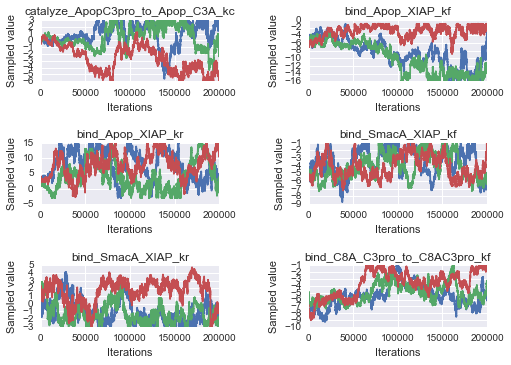

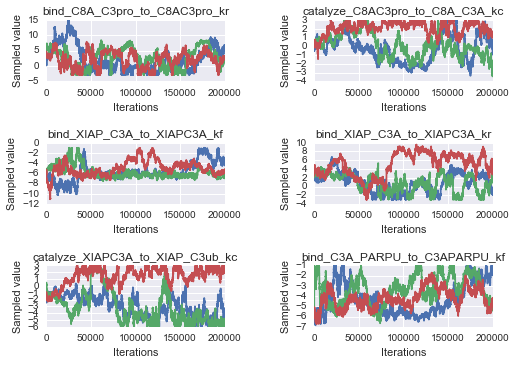

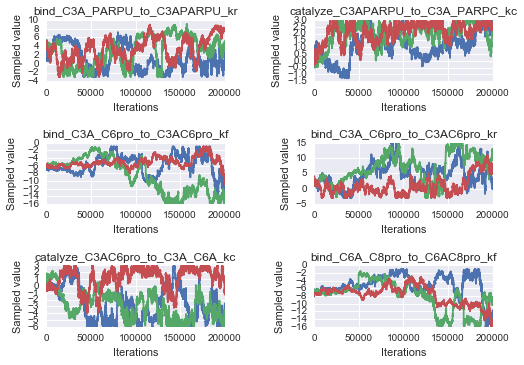

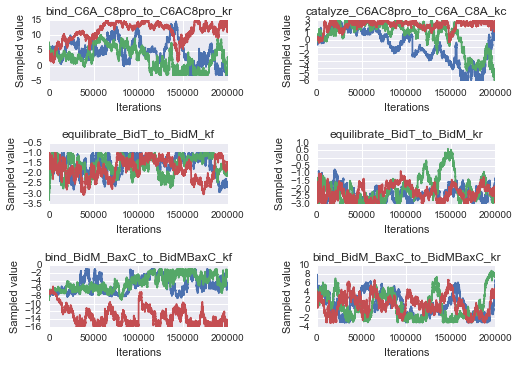

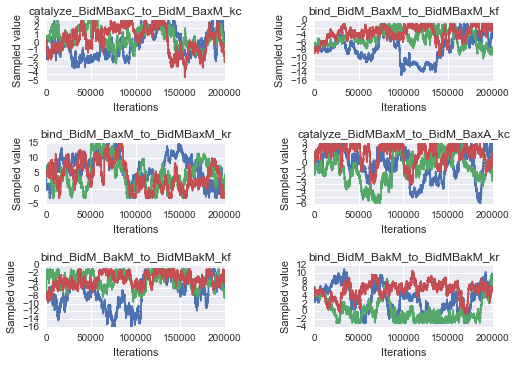

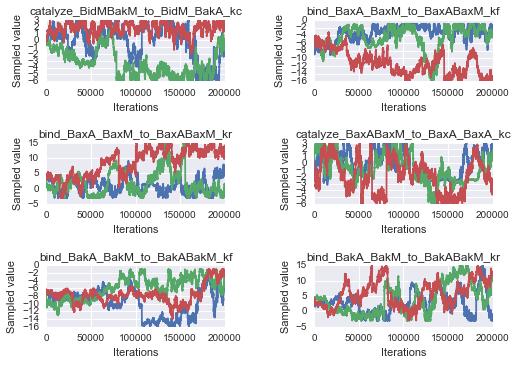

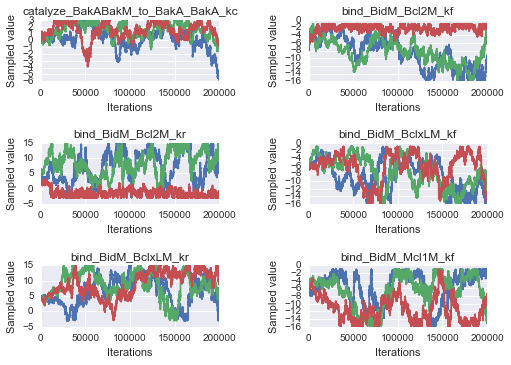

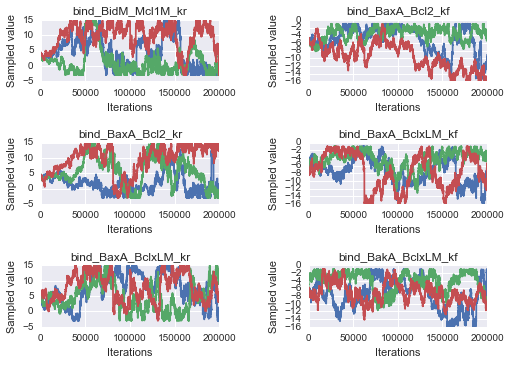

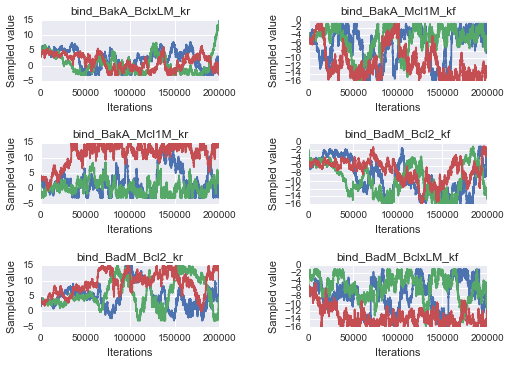

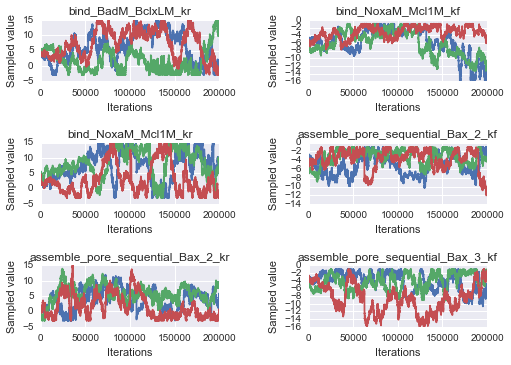

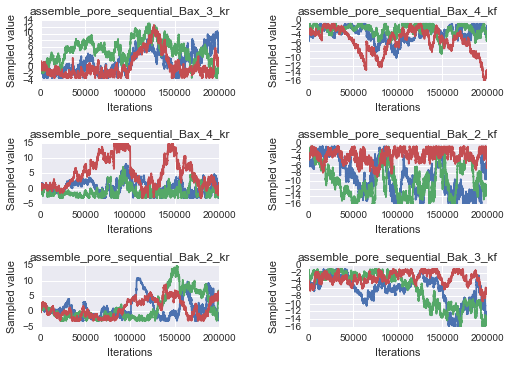

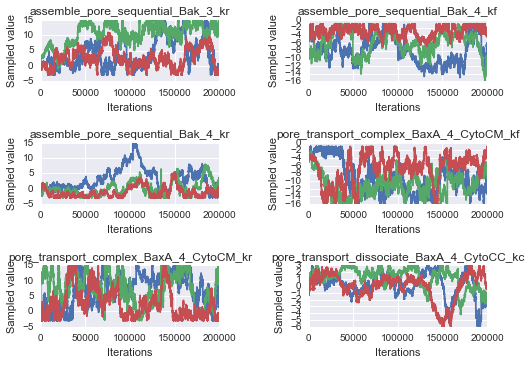

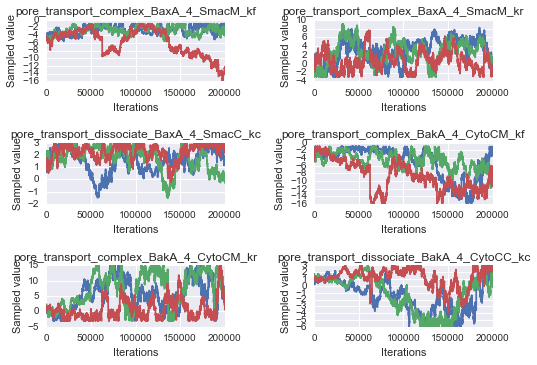

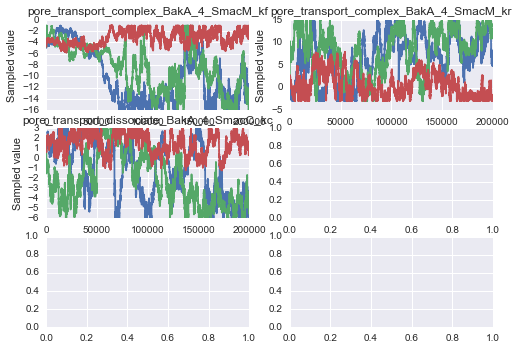

In [13]:
sample_plots(param_trace_dicts['a'])

200000
3
200000


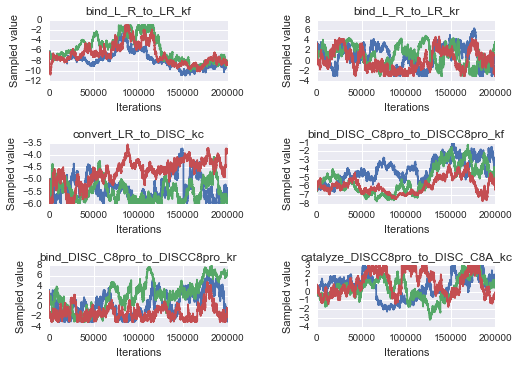

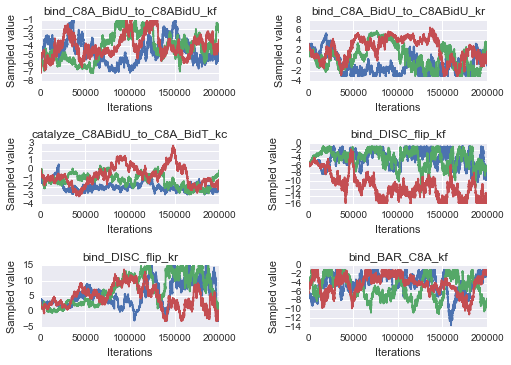

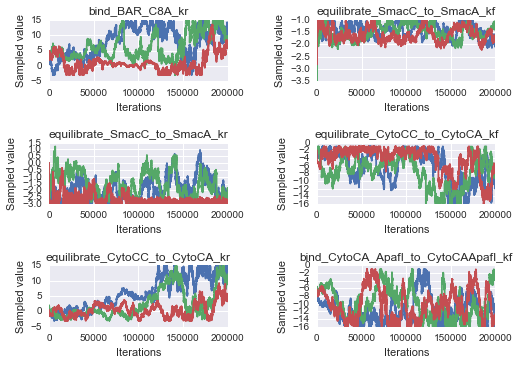

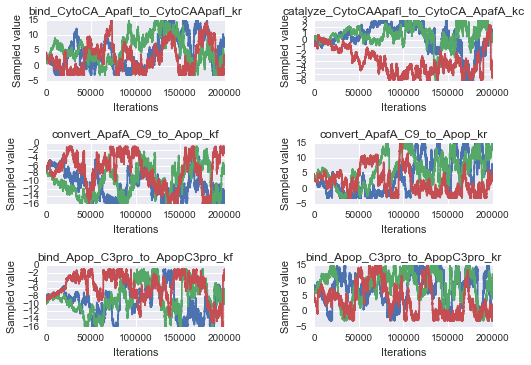

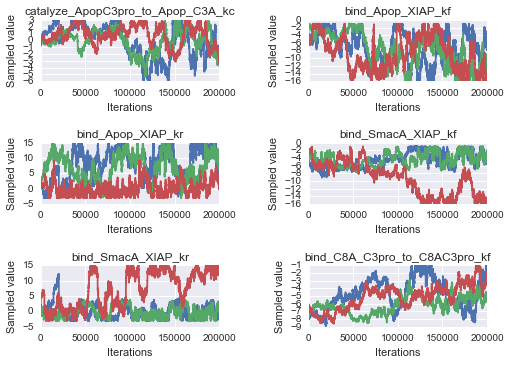

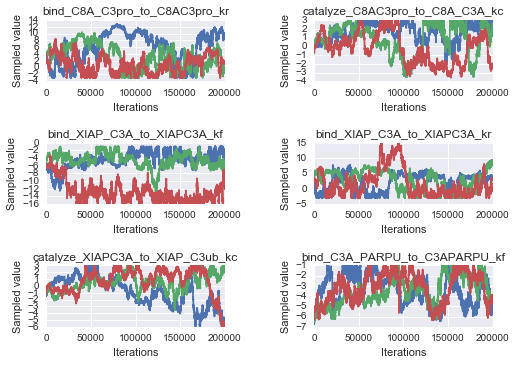

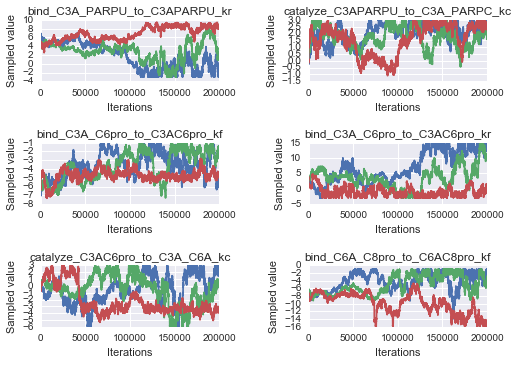

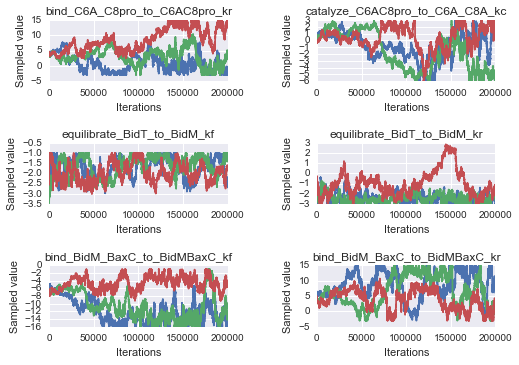

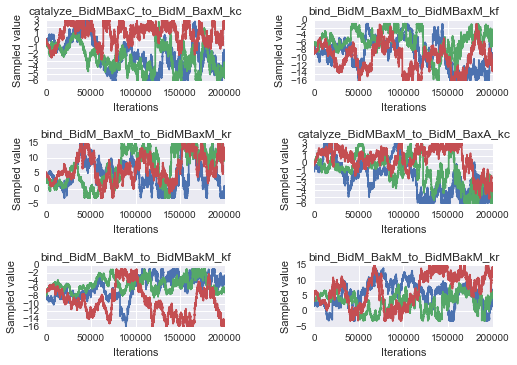

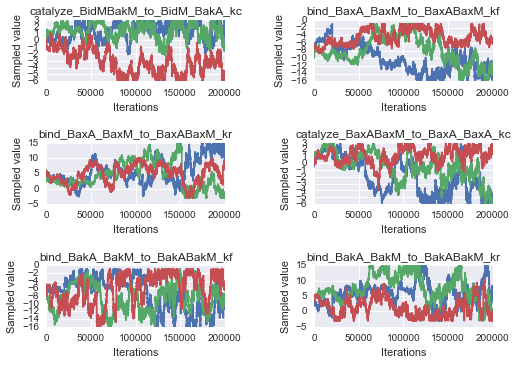

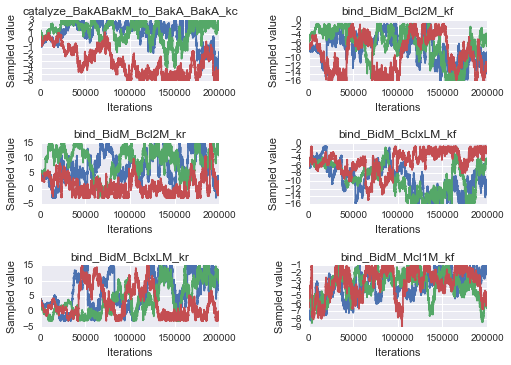

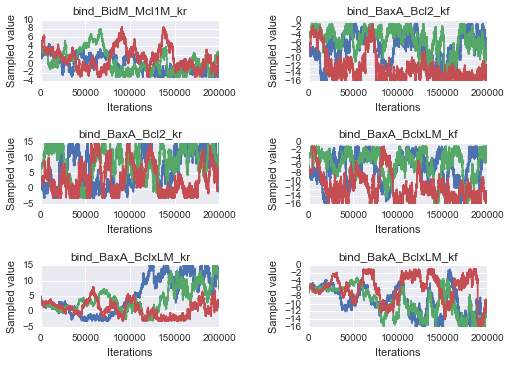

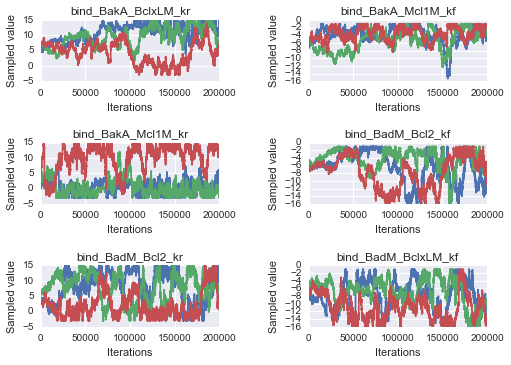

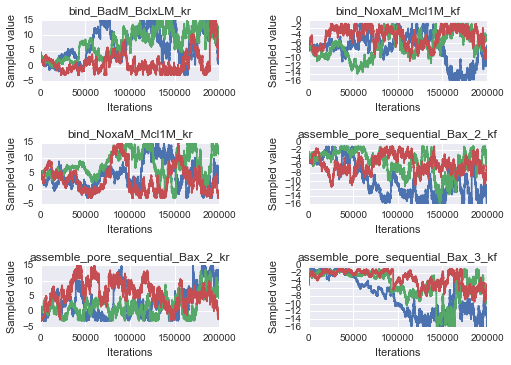

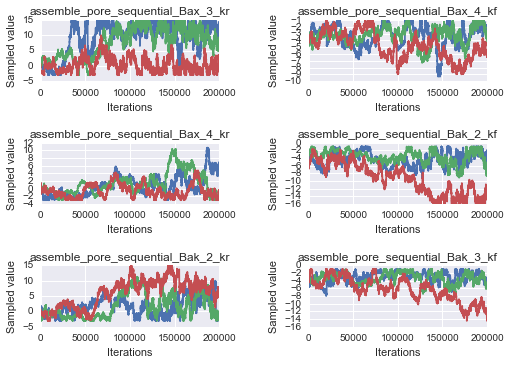

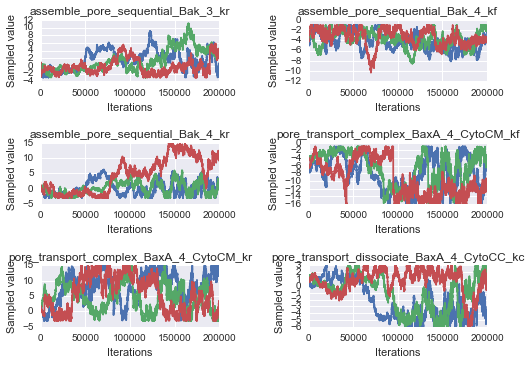

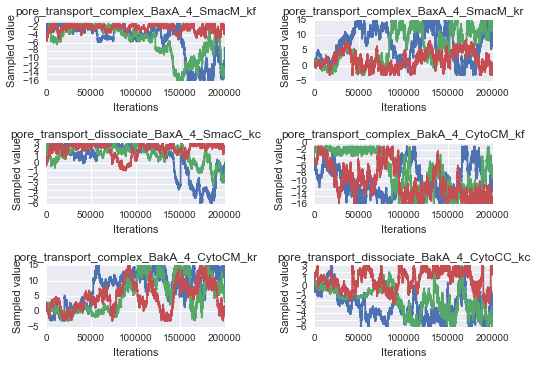

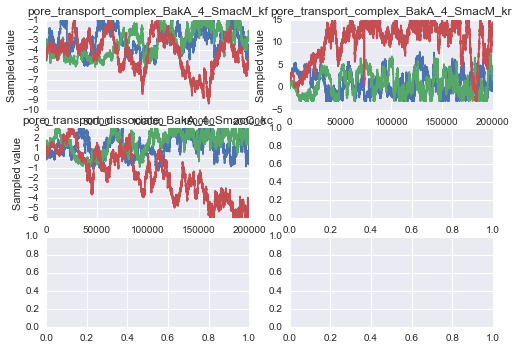

In [14]:
sample_plots(param_trace_dicts['b'])

In [15]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=25000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=25000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=25000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=25000, thin=1)

/sw/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


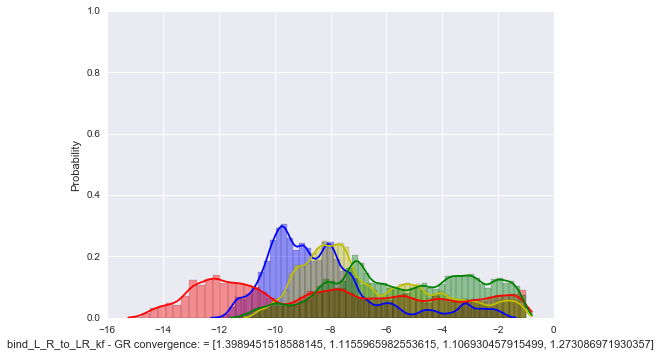

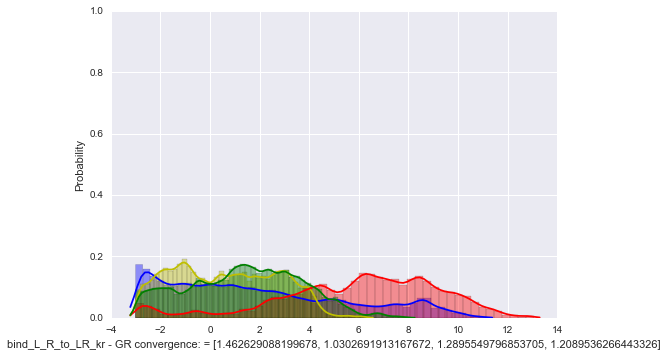

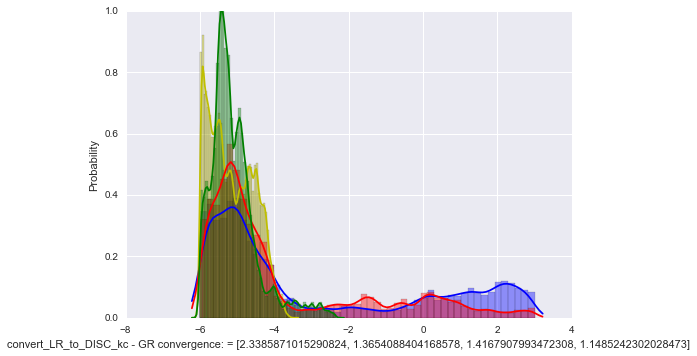

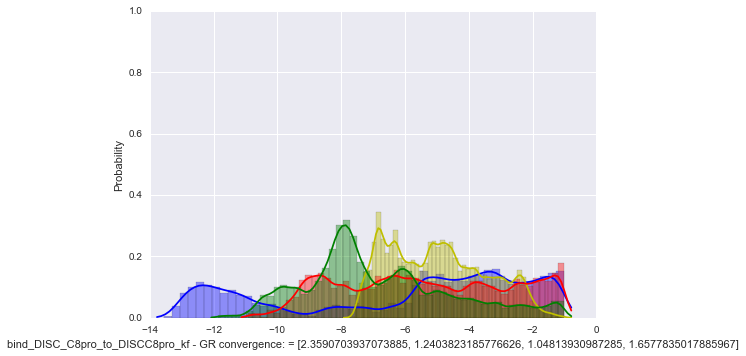

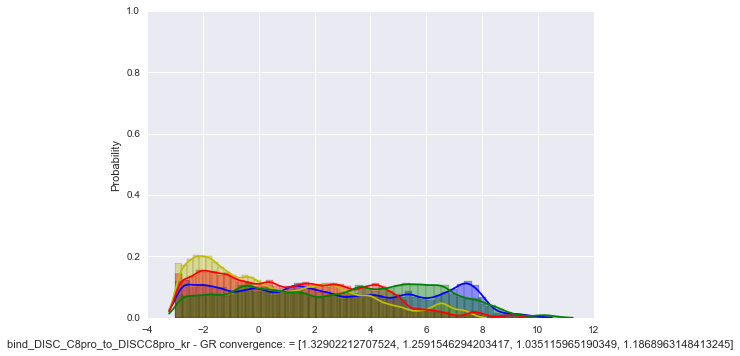

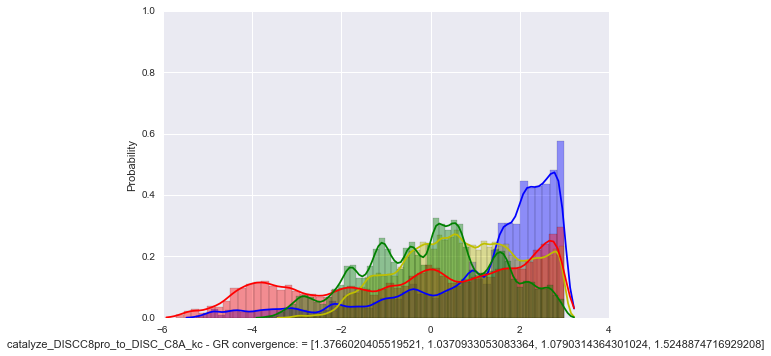

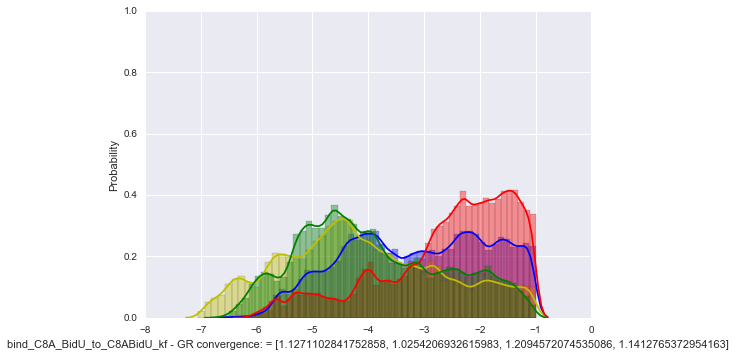

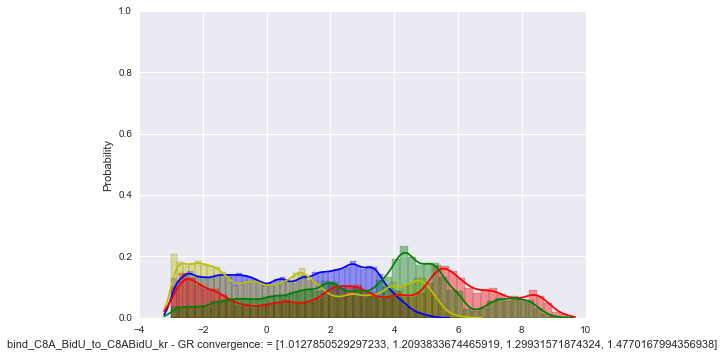

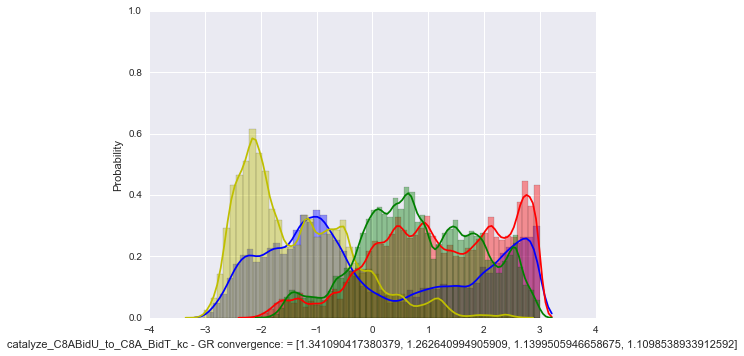

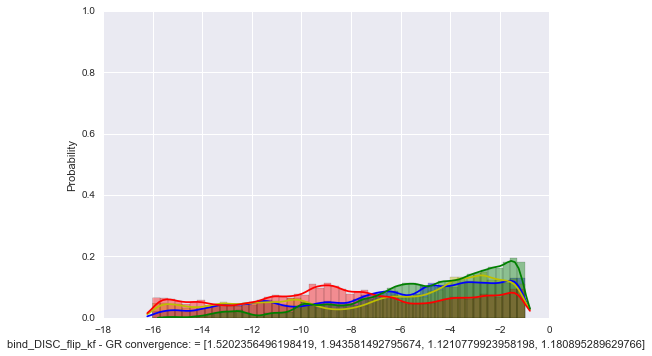

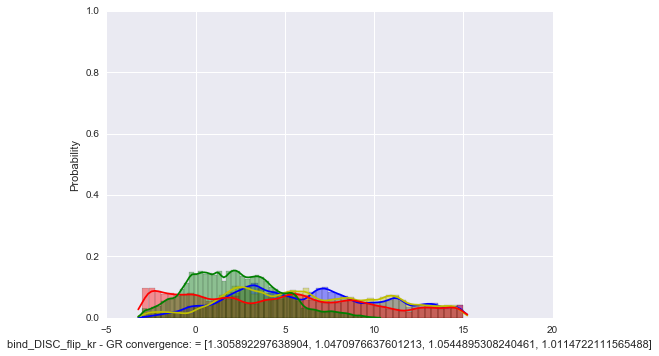

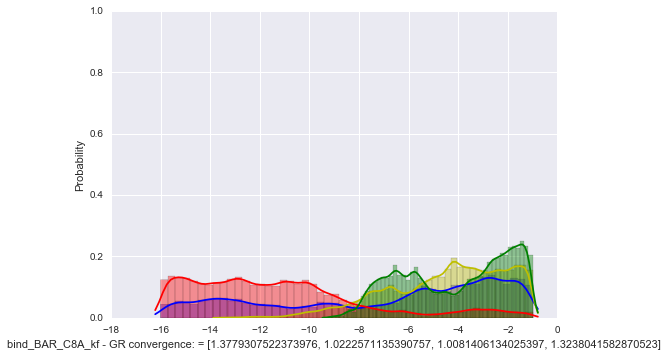

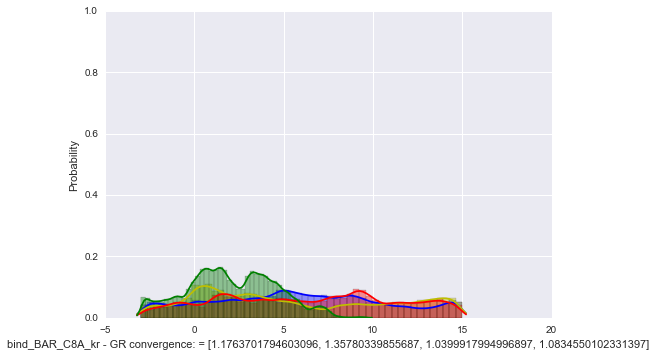

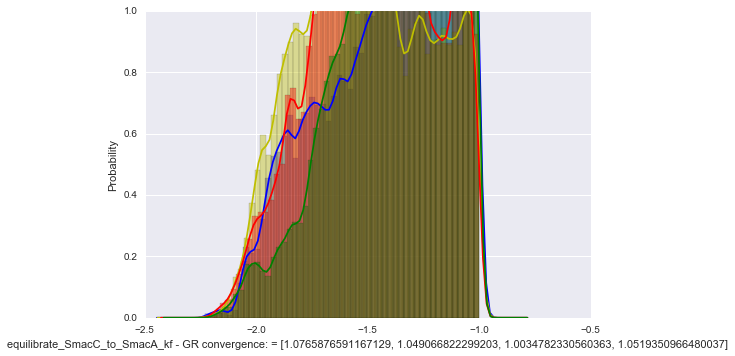

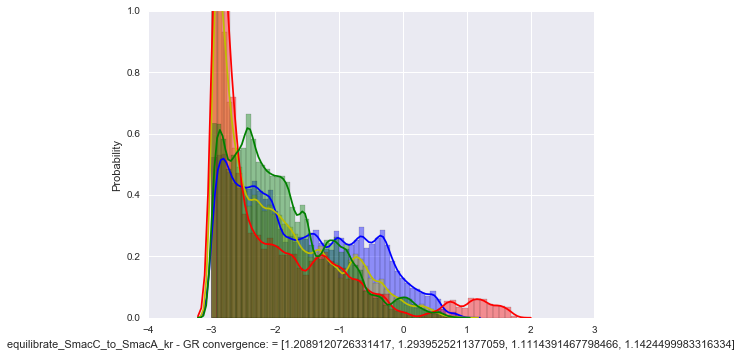

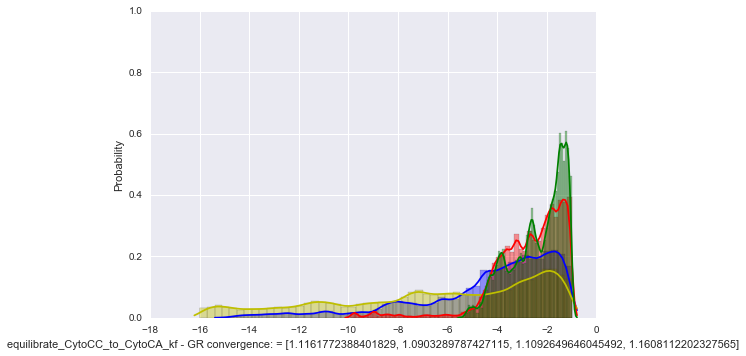

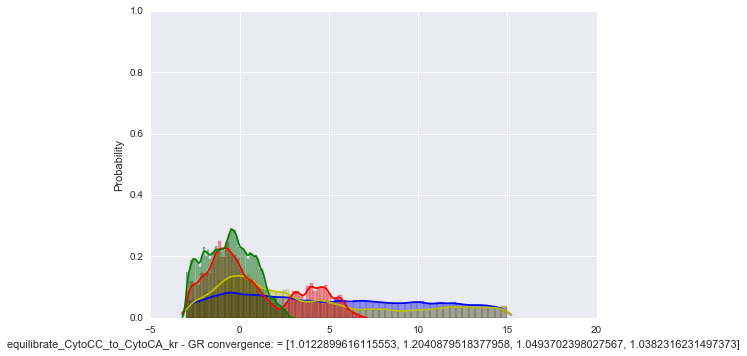

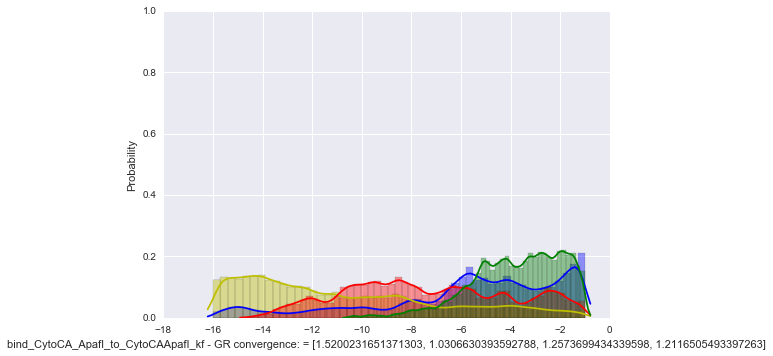

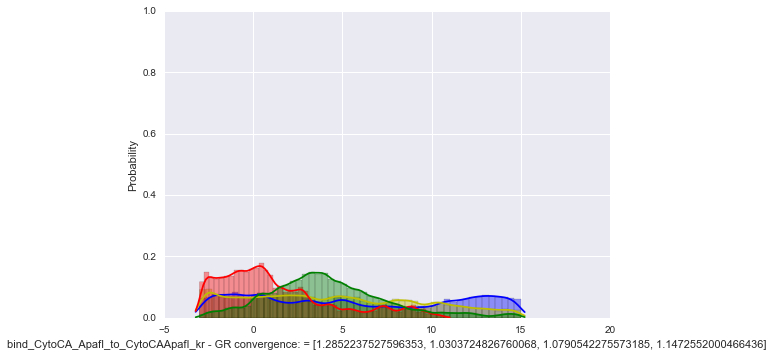

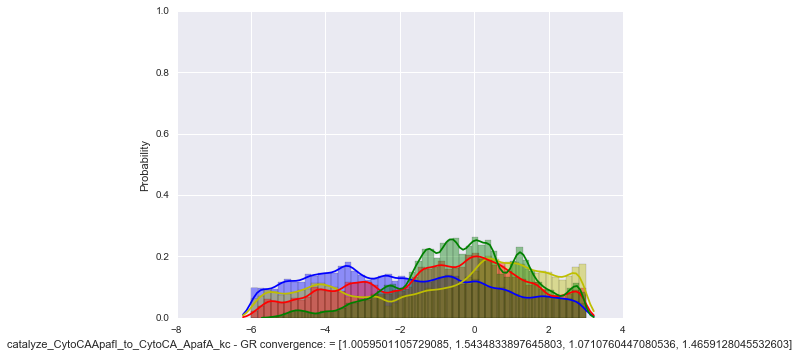

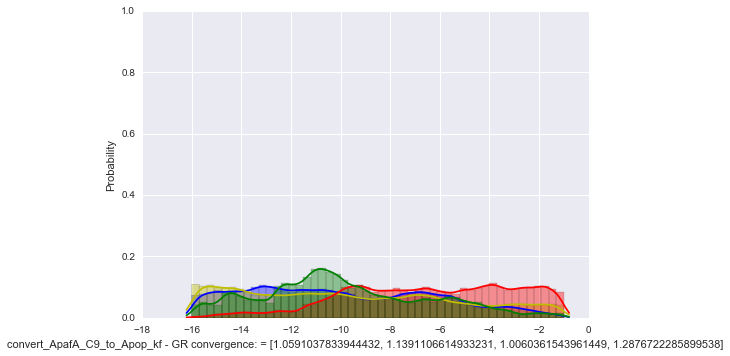

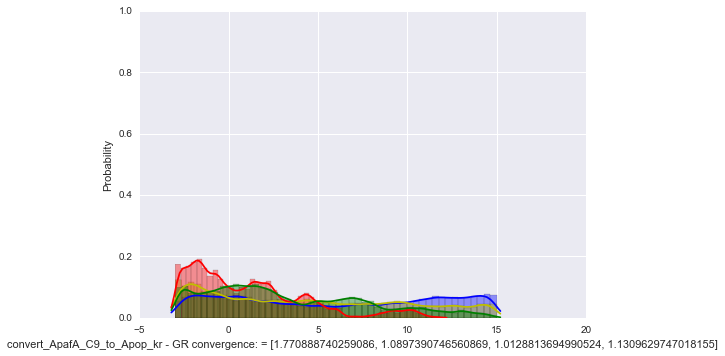

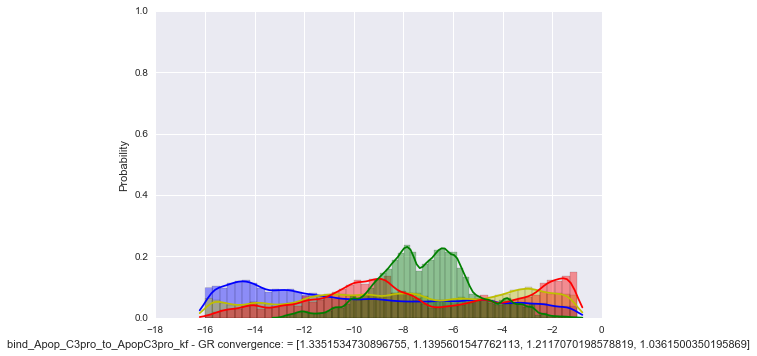

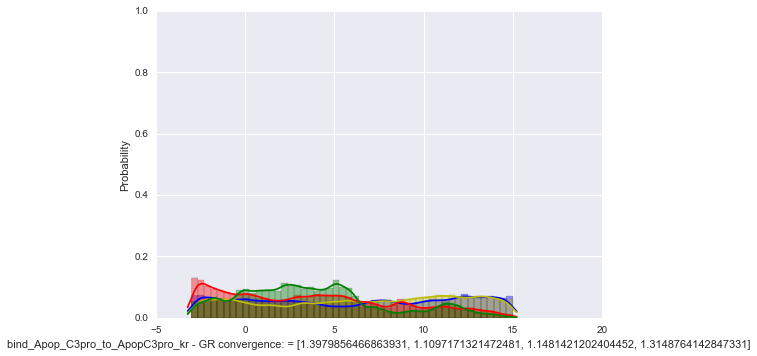

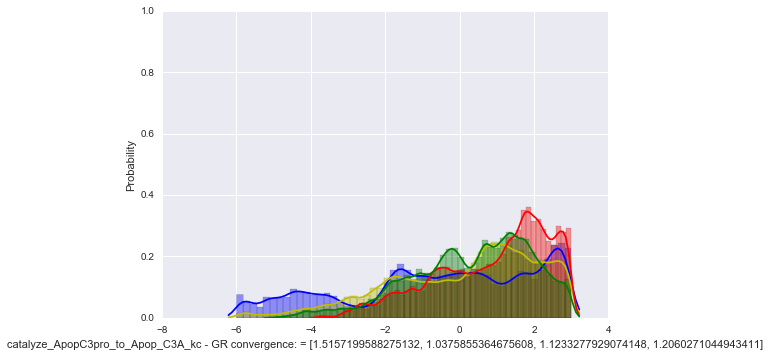

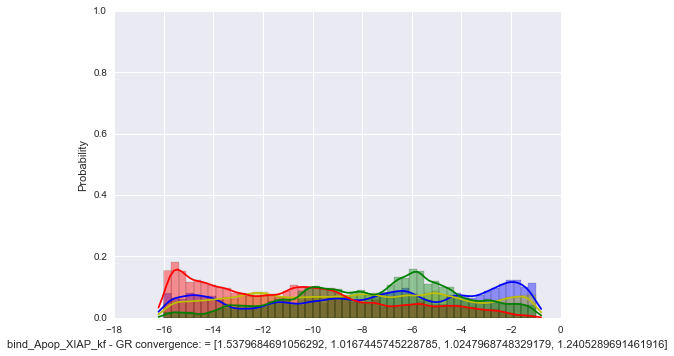

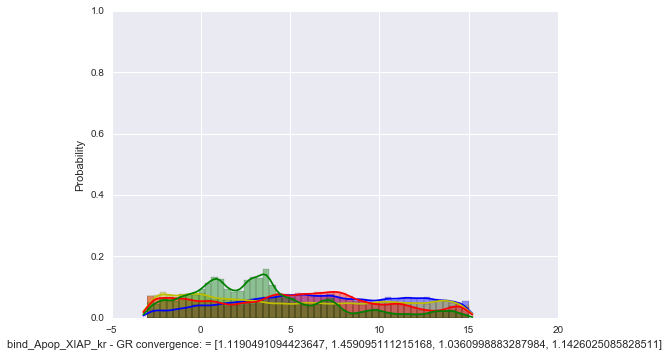

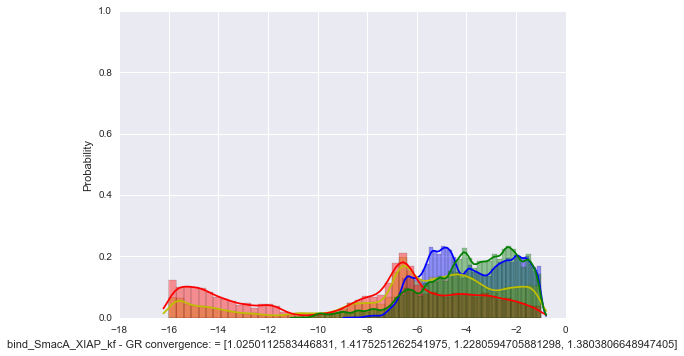

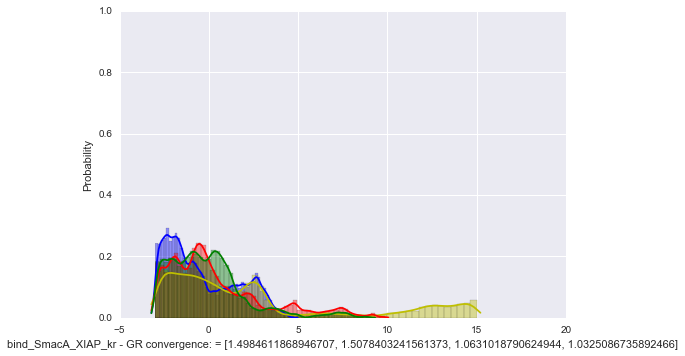

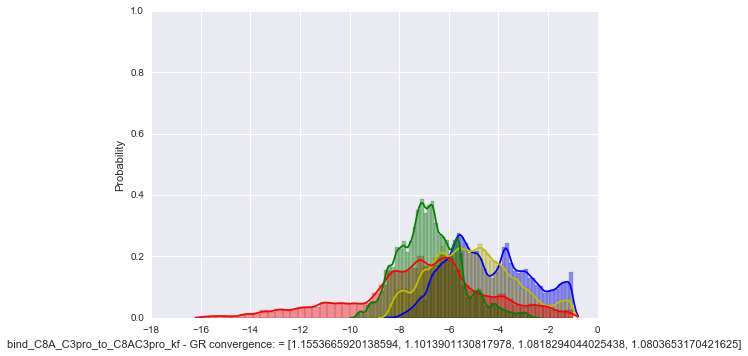

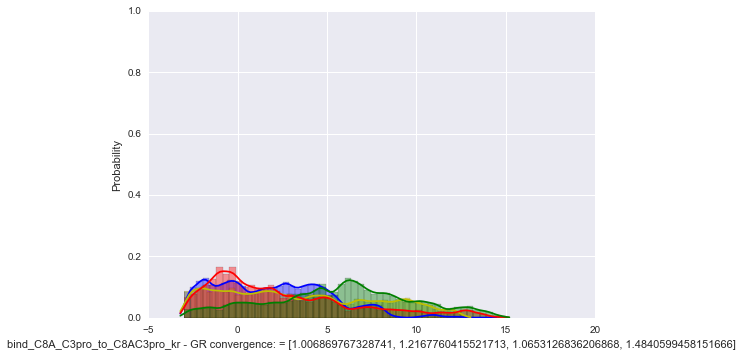

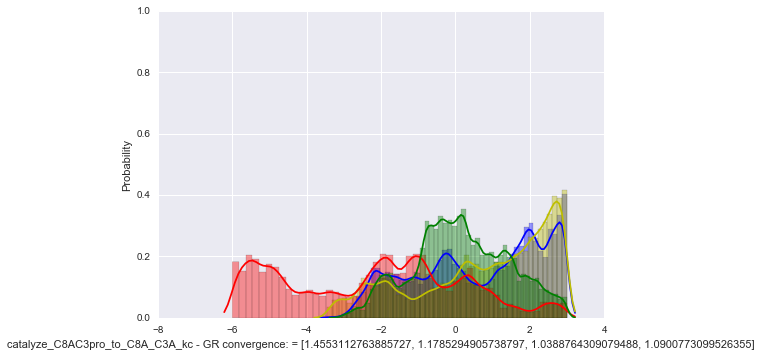

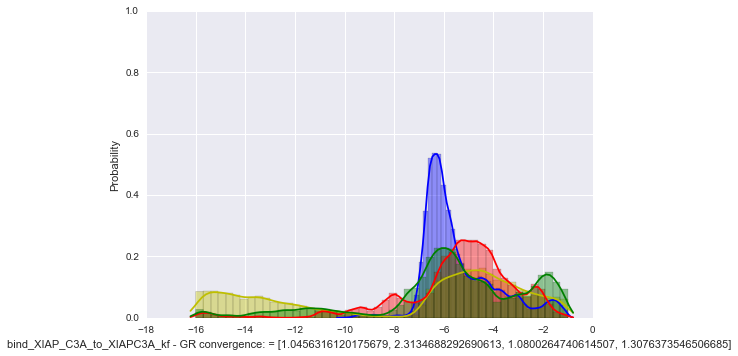

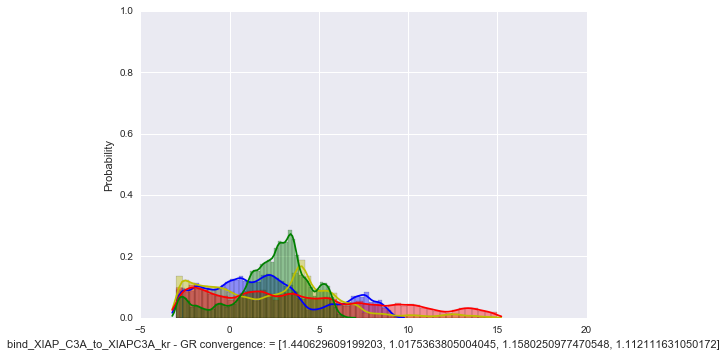

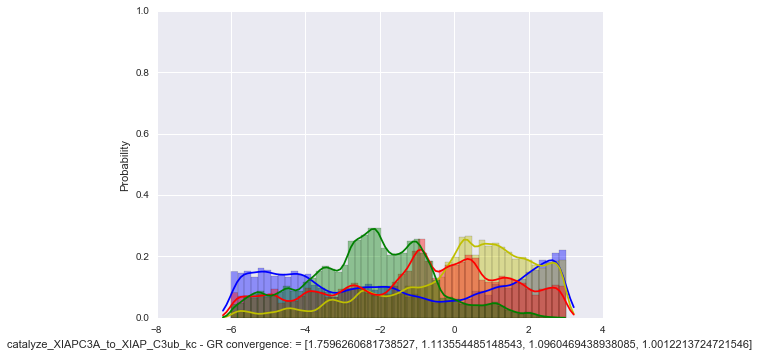

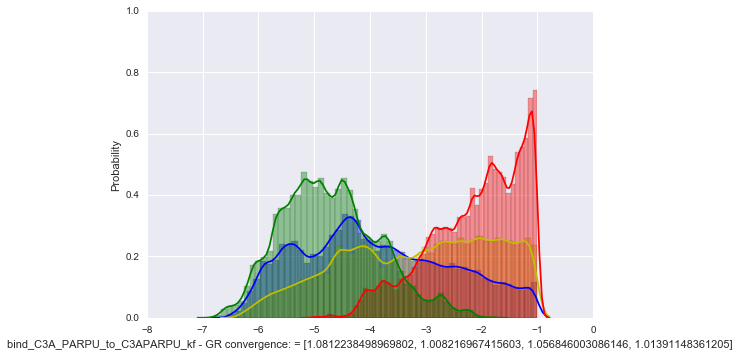

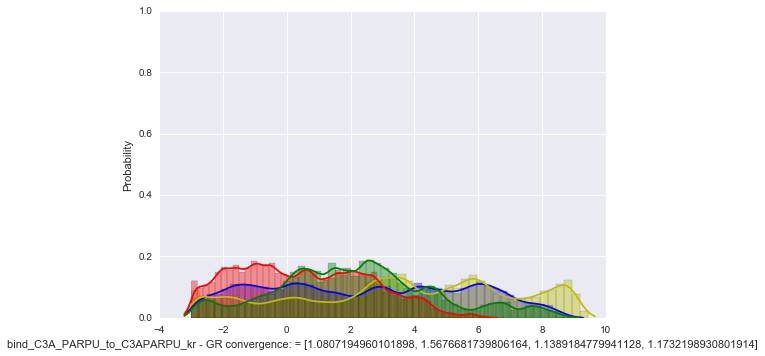

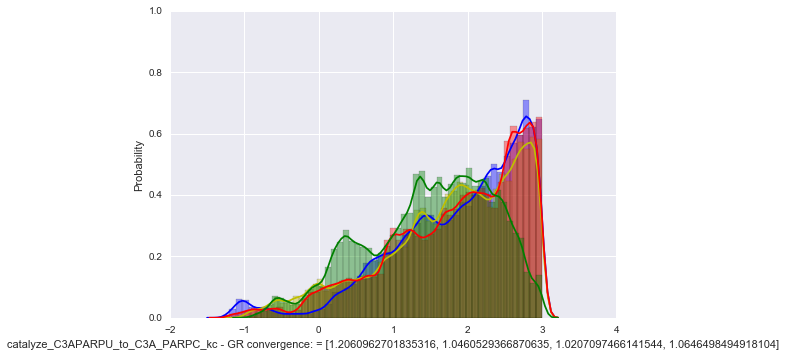

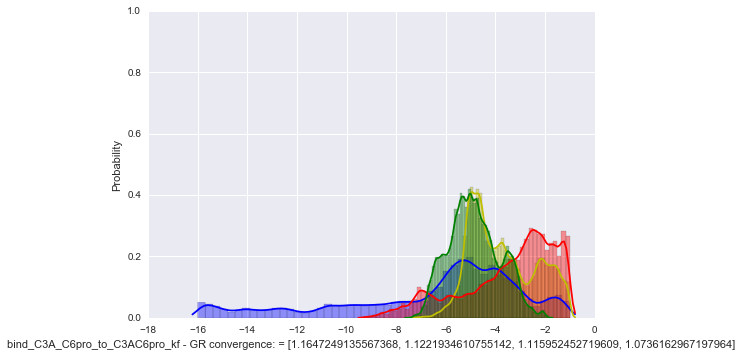

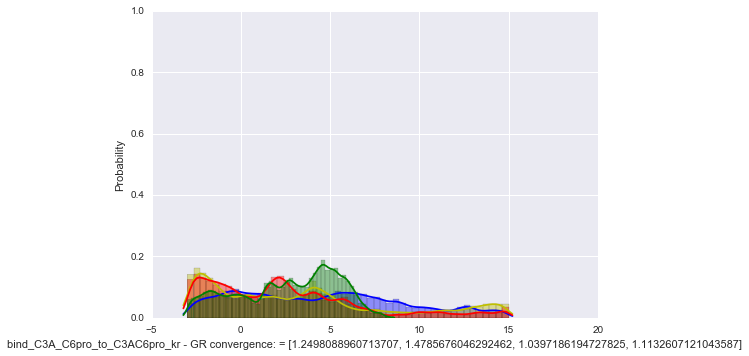

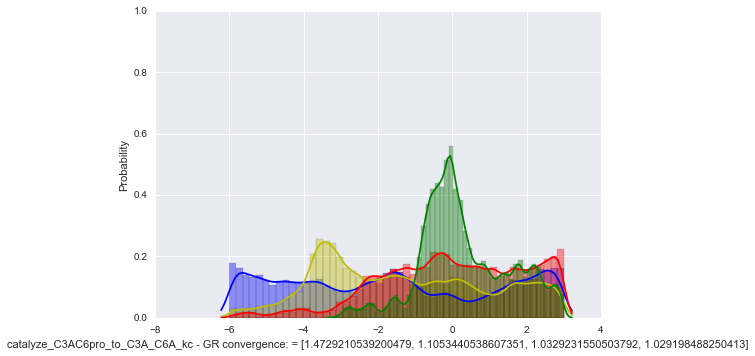

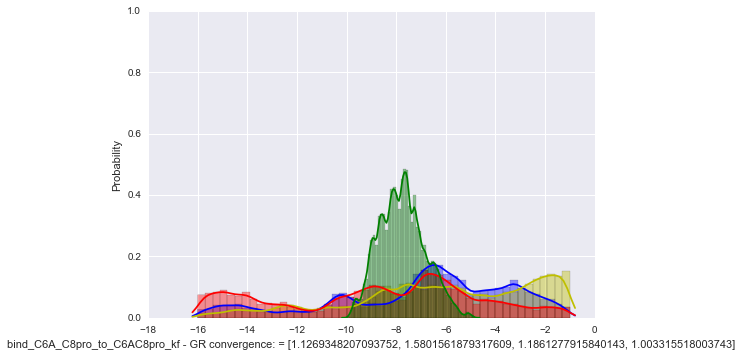

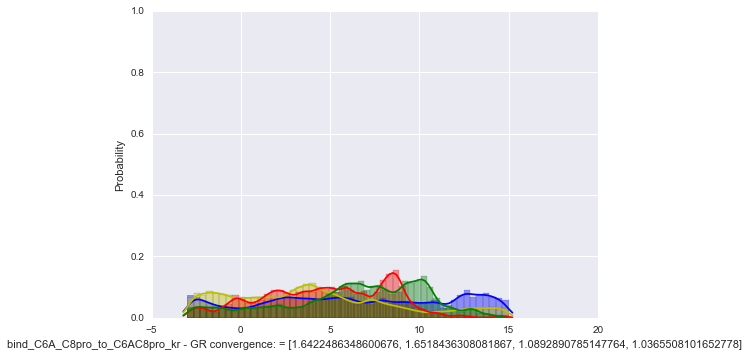

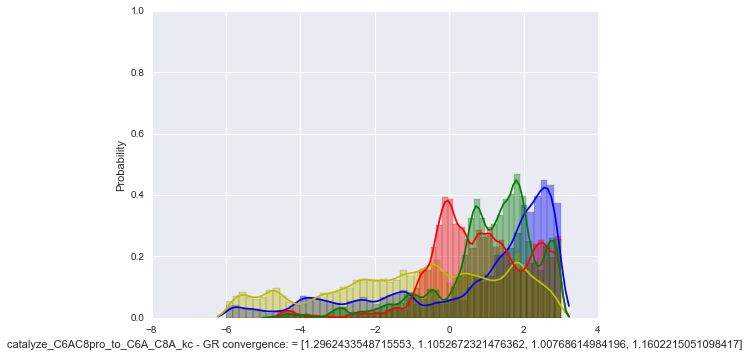

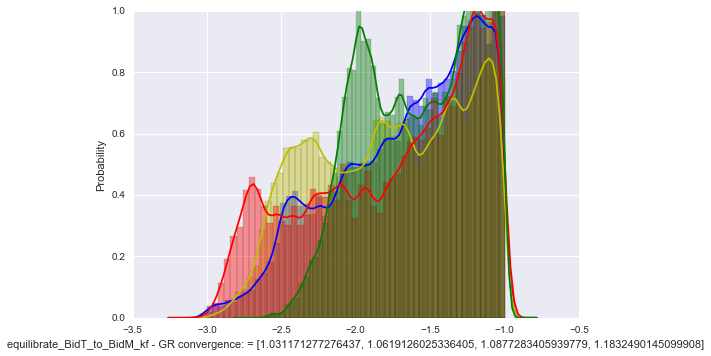

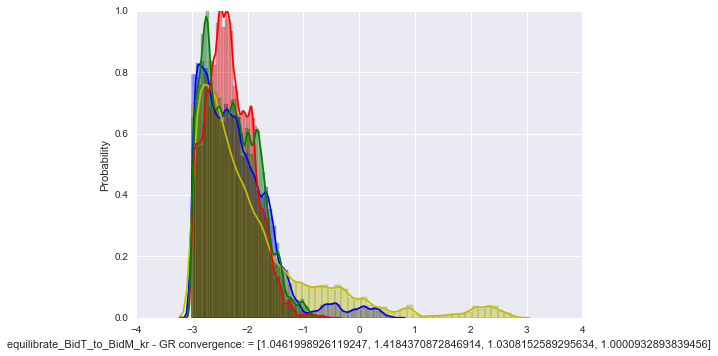

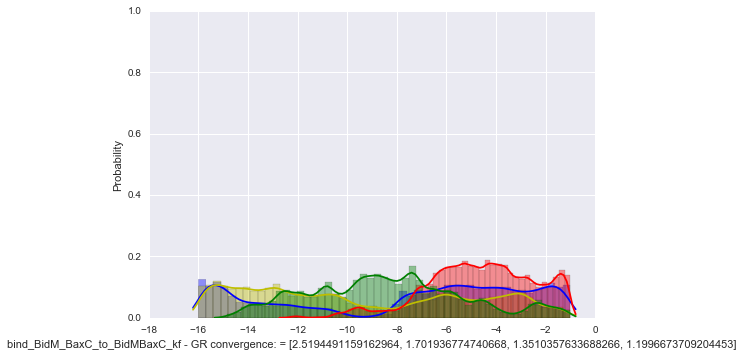

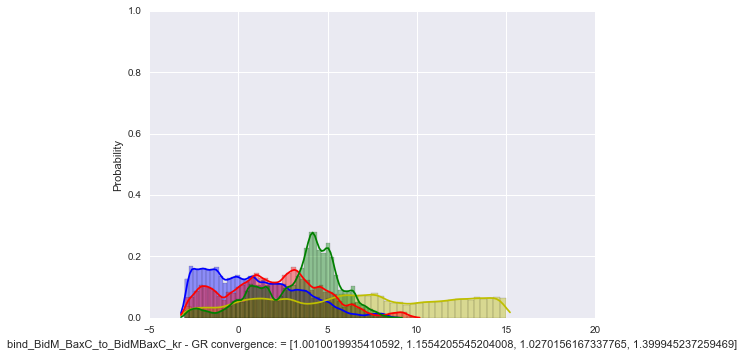

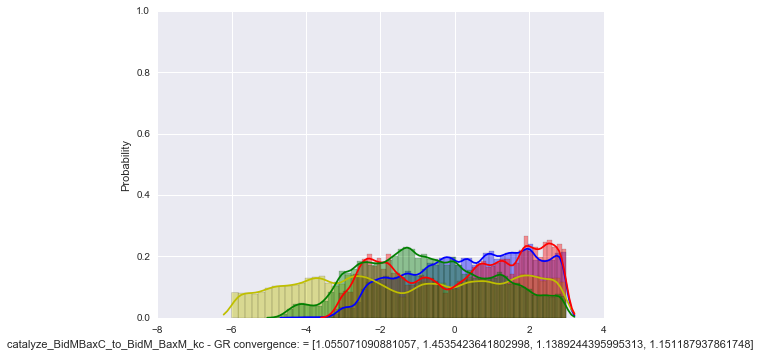

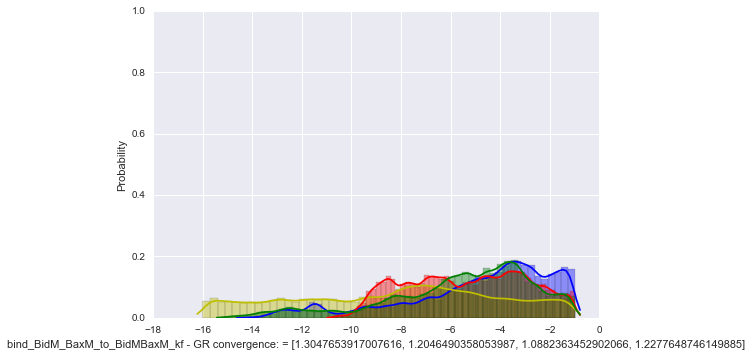

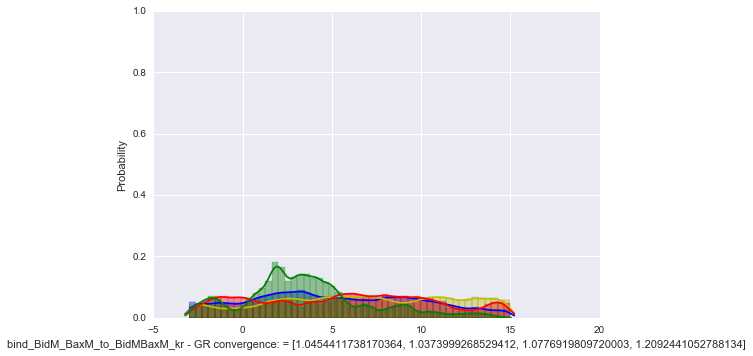

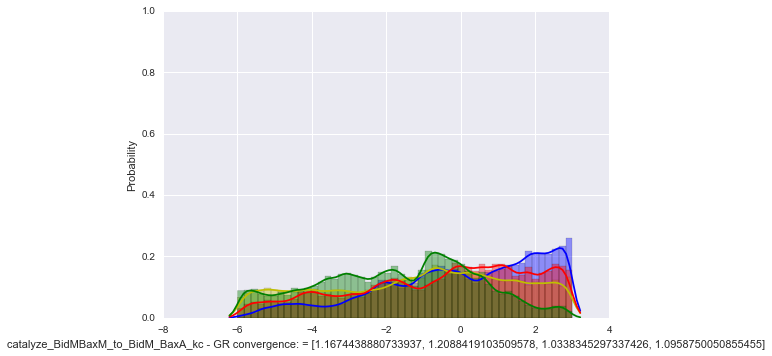

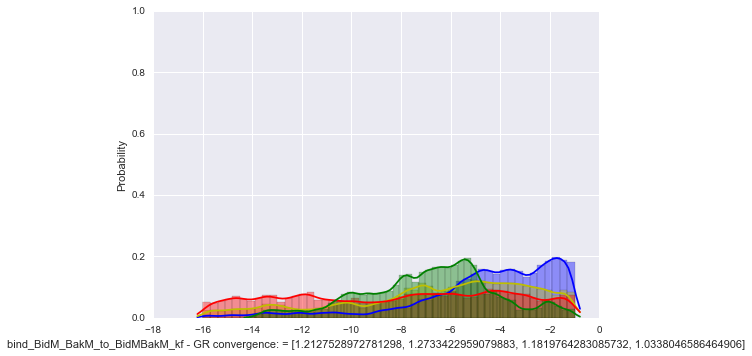

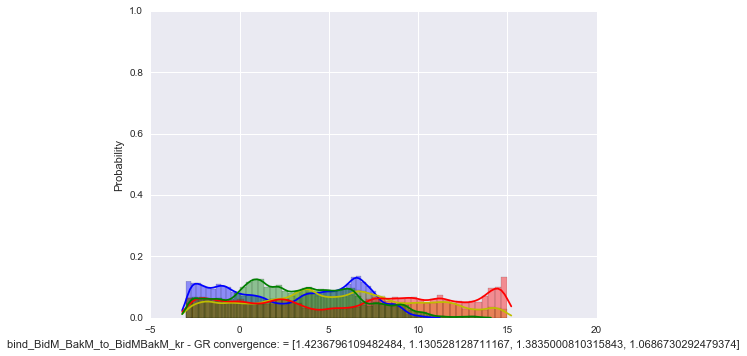

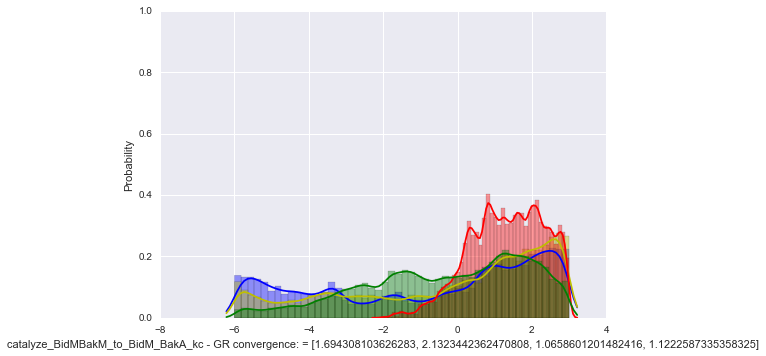

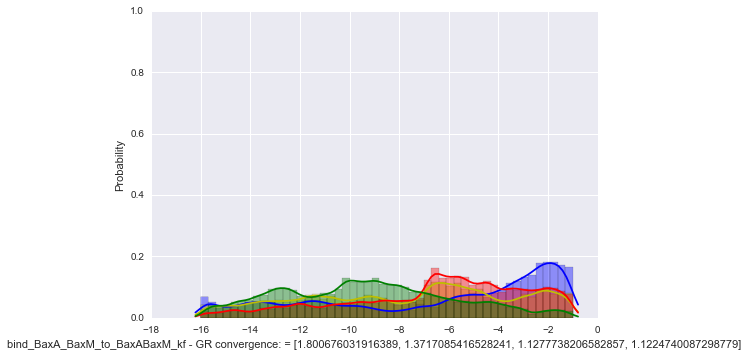

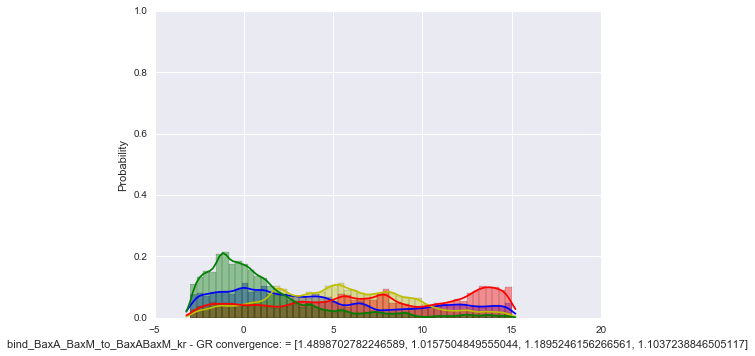

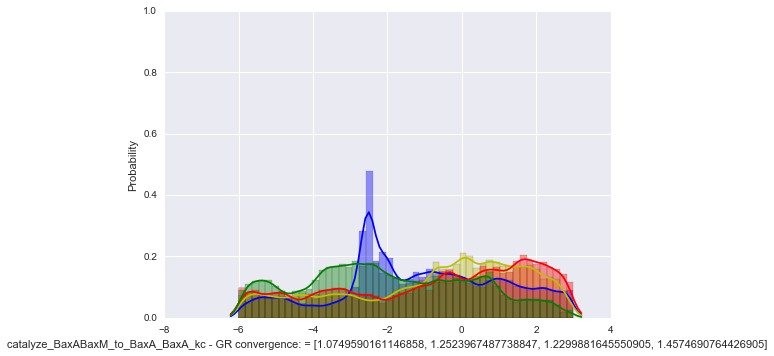

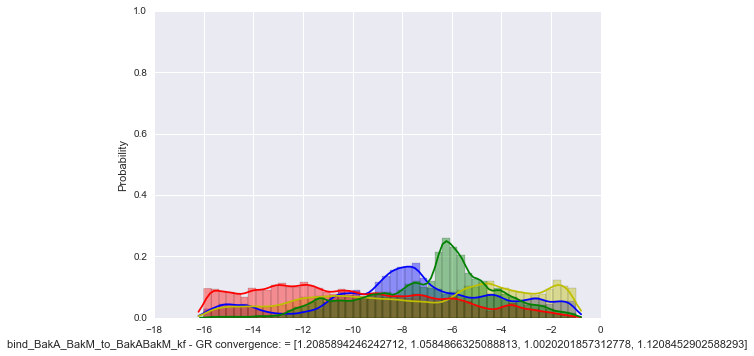

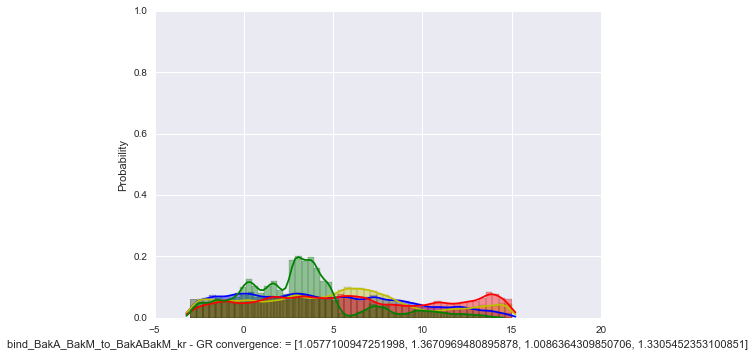

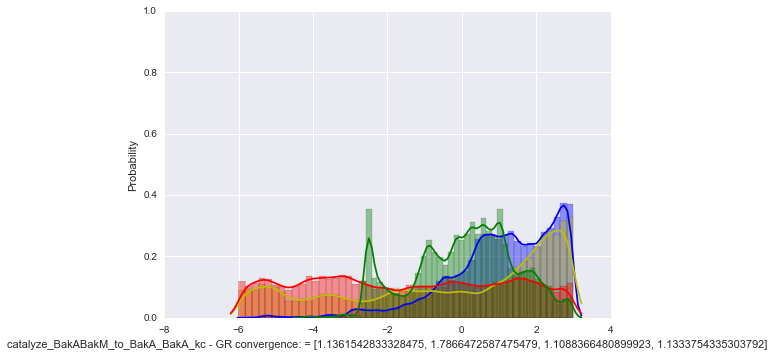

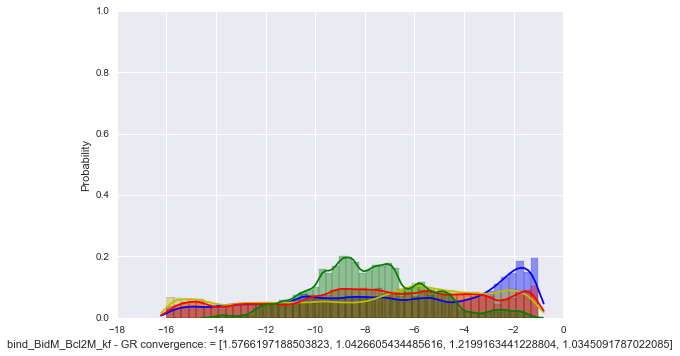

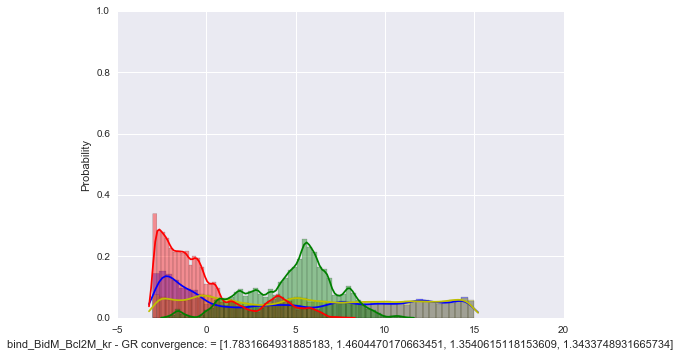

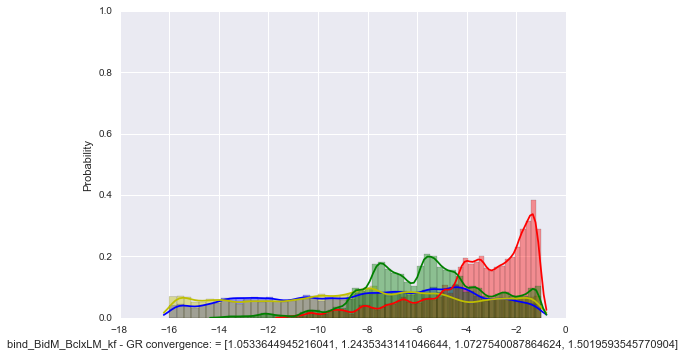

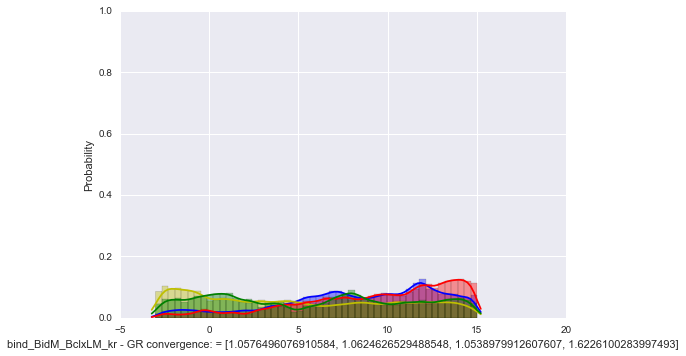

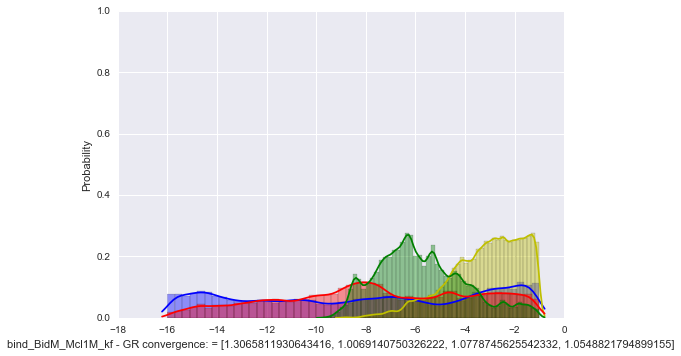

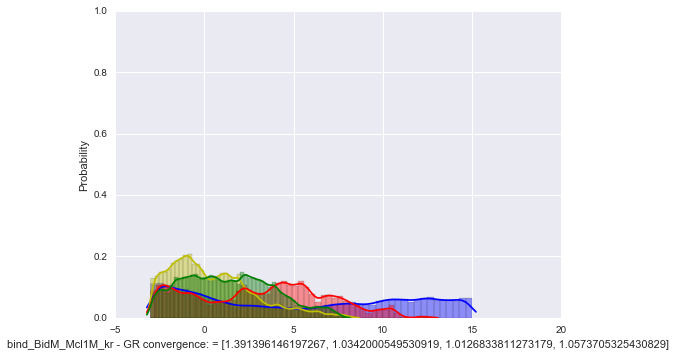

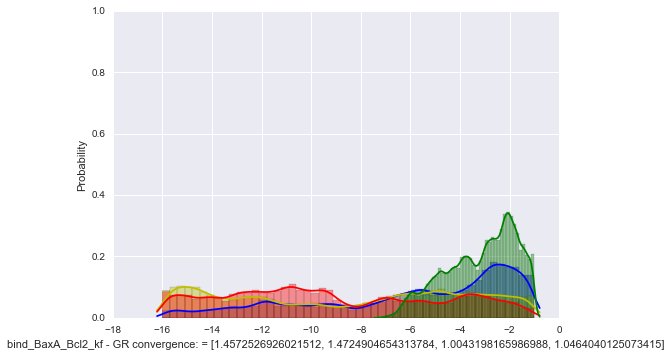

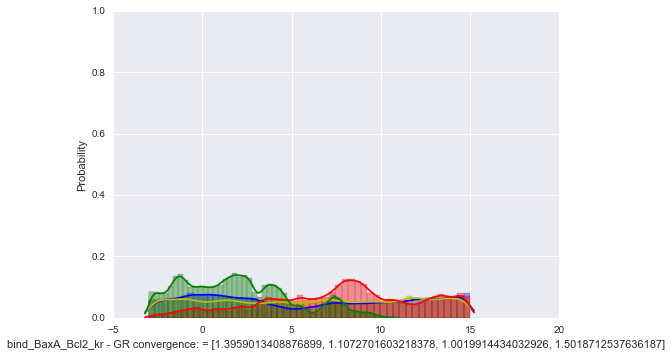

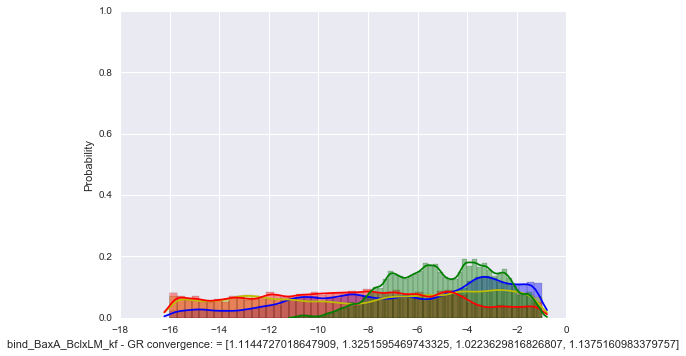

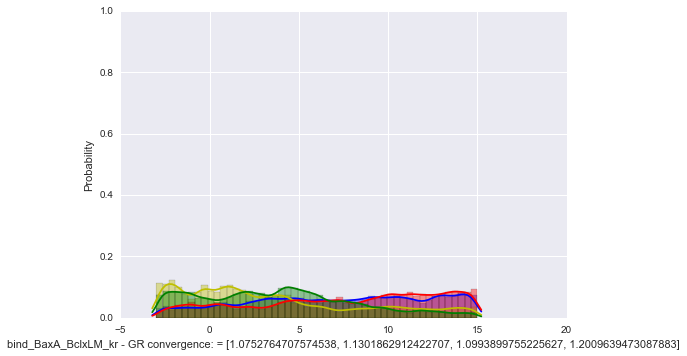

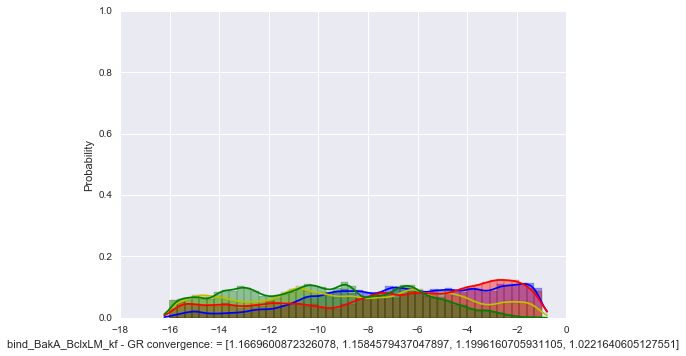

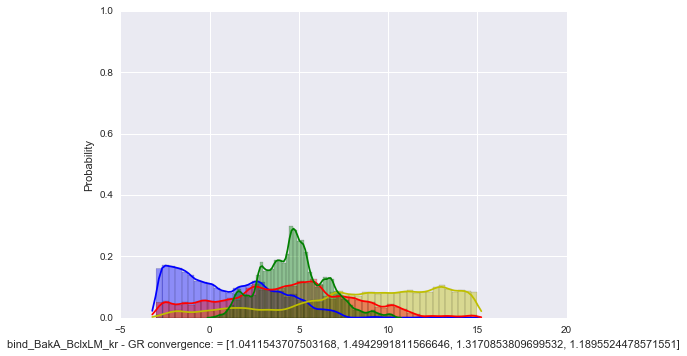

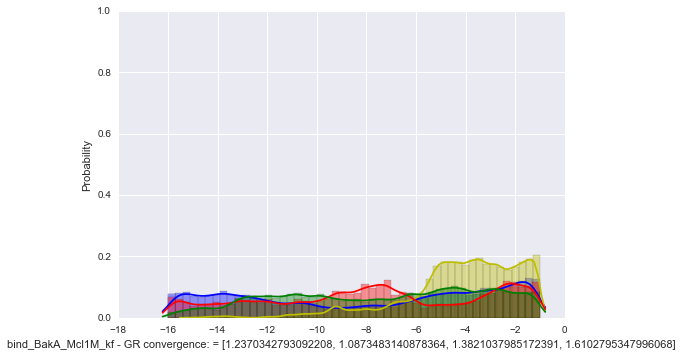

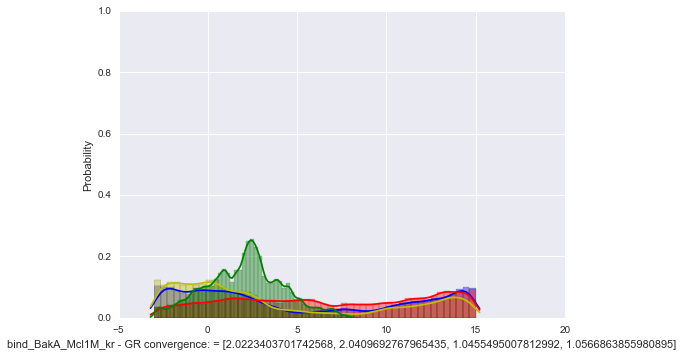

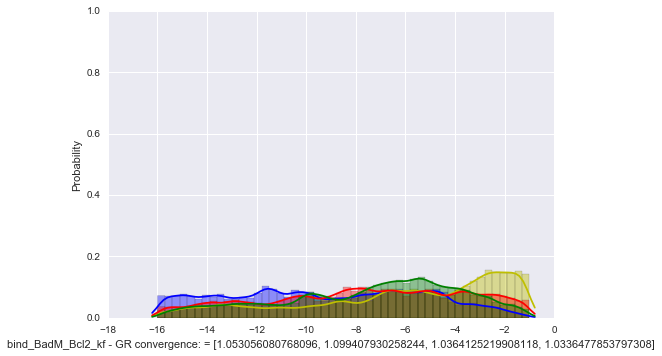

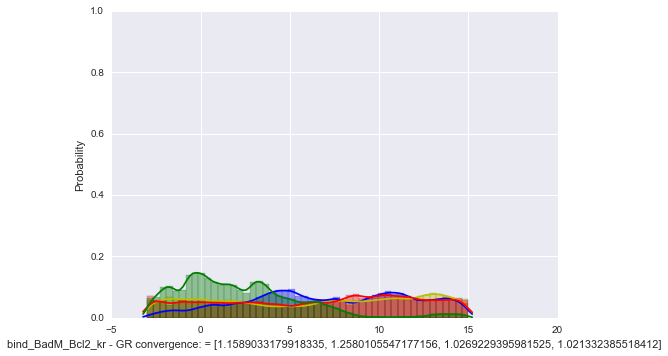

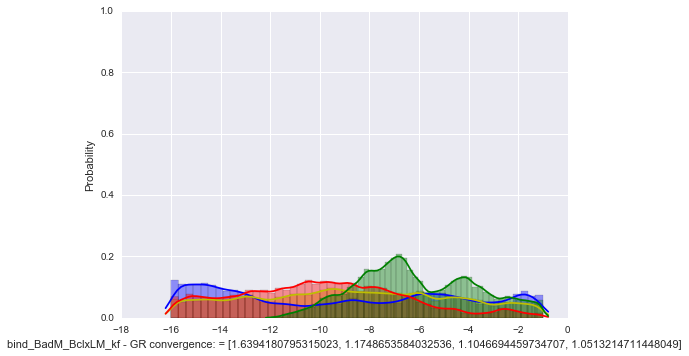

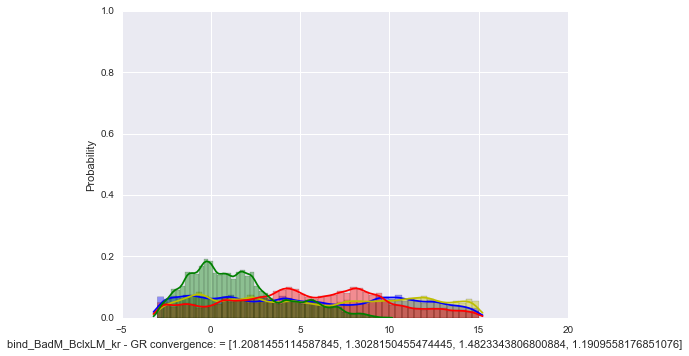

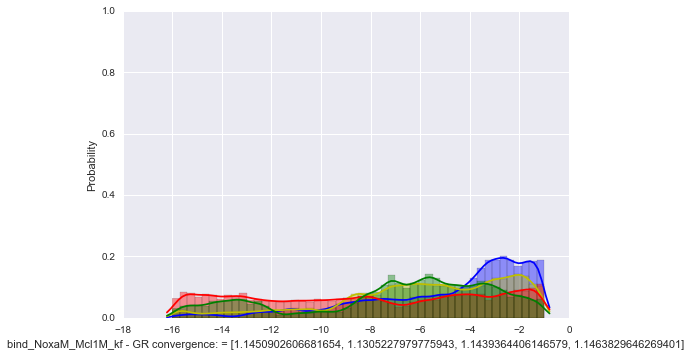

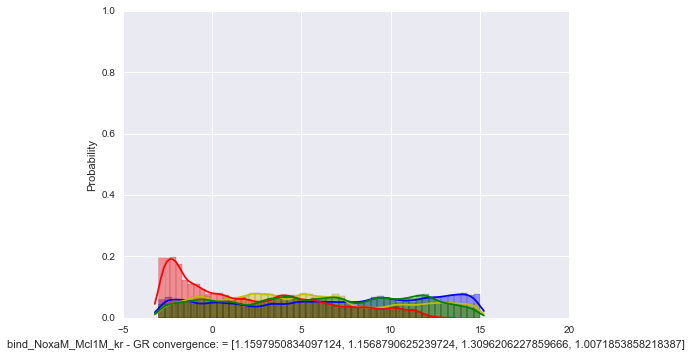

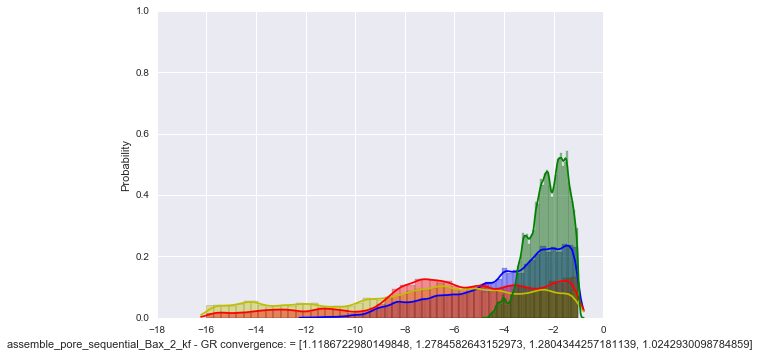

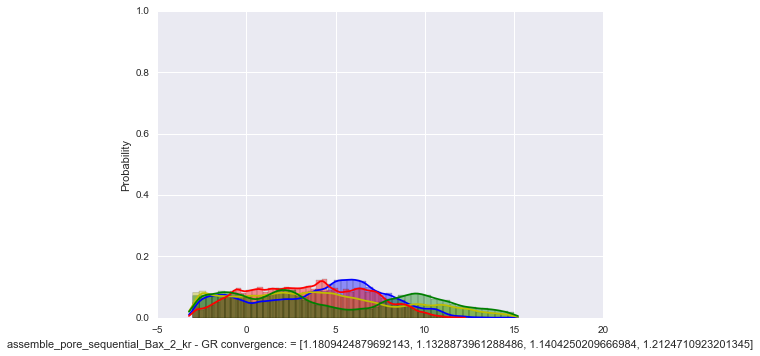

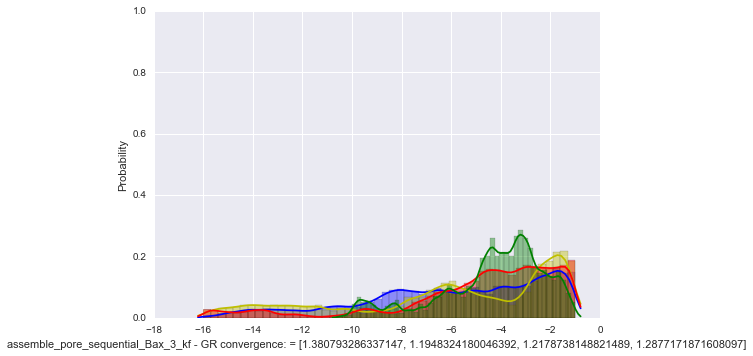

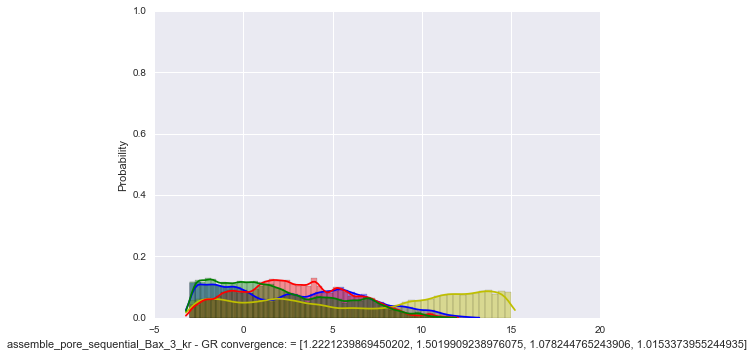

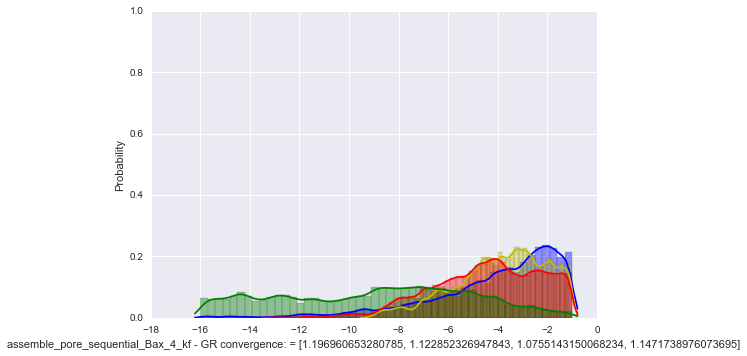

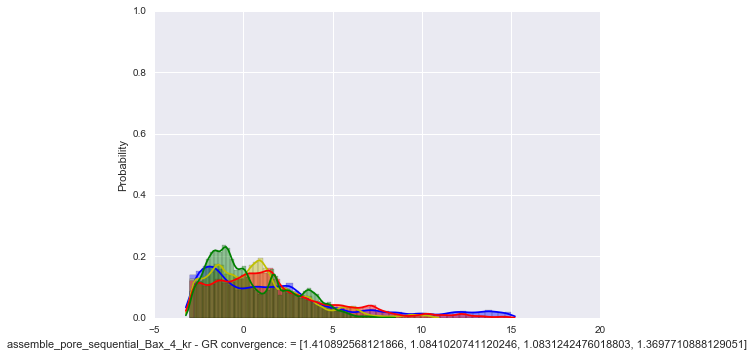

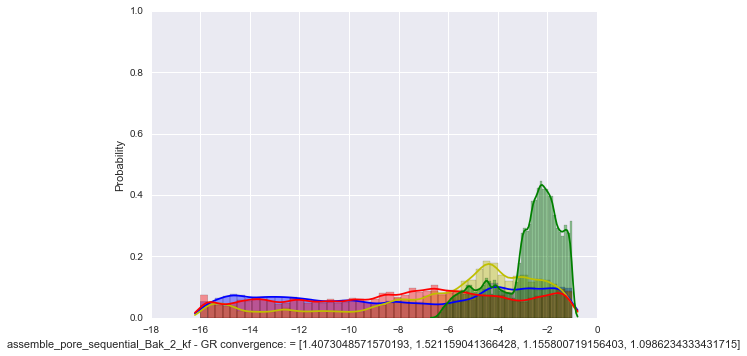

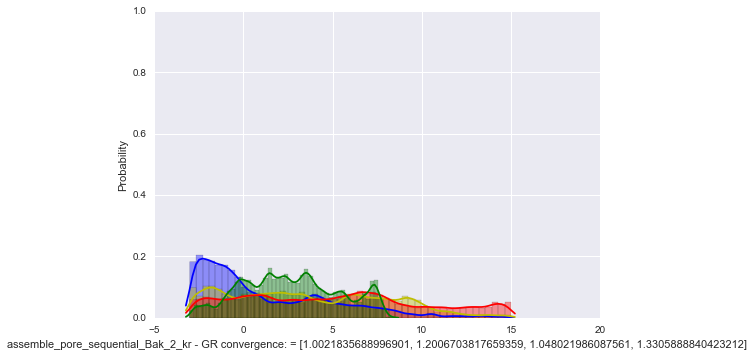

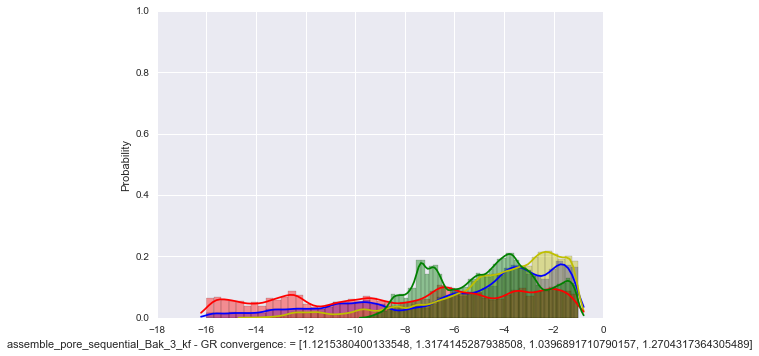

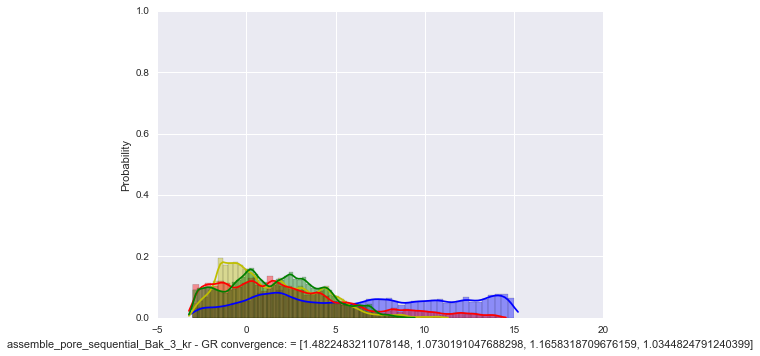

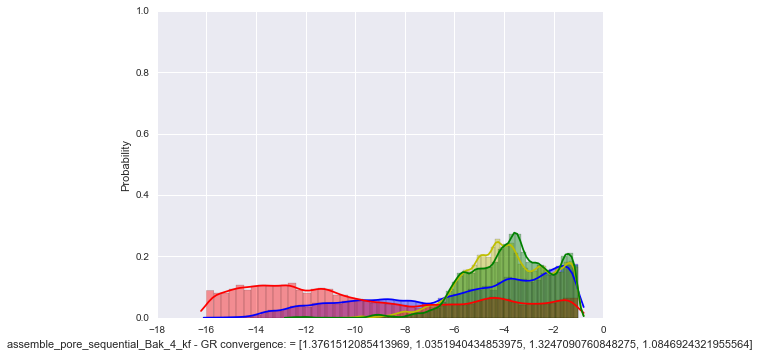

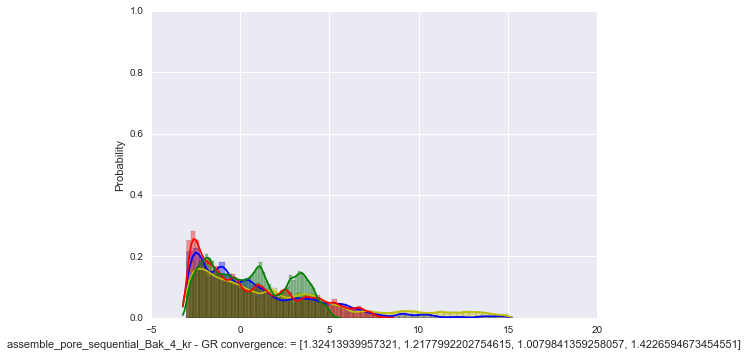

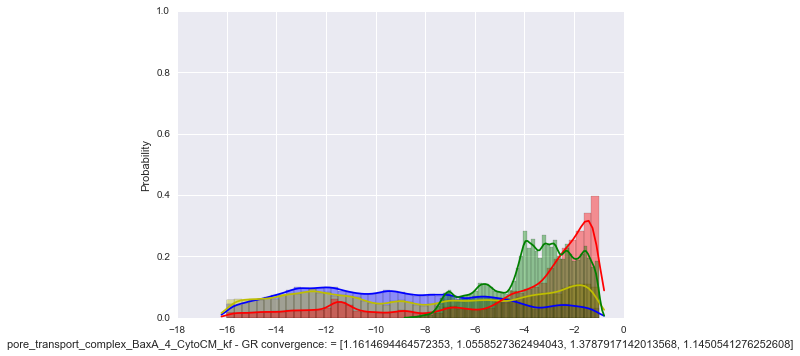

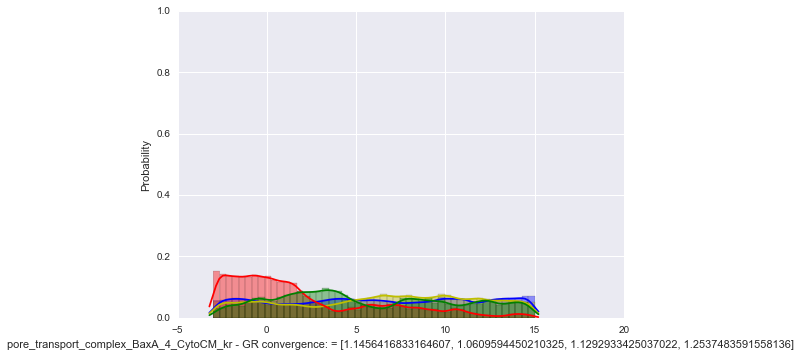

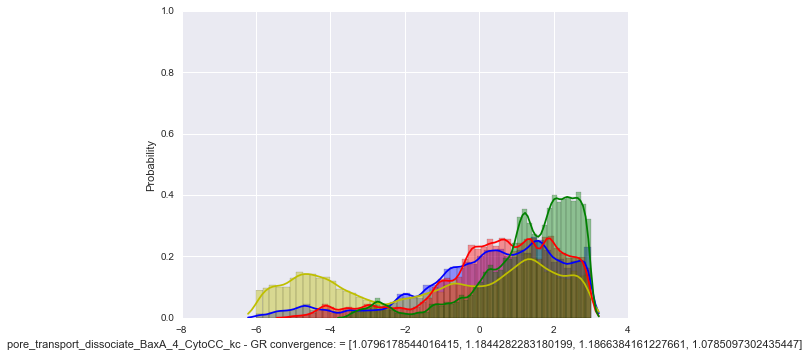

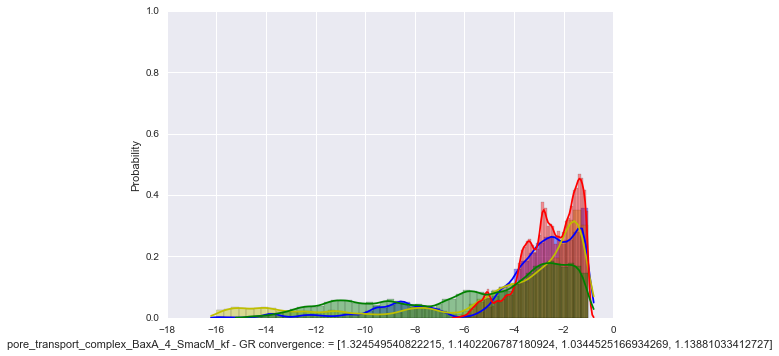

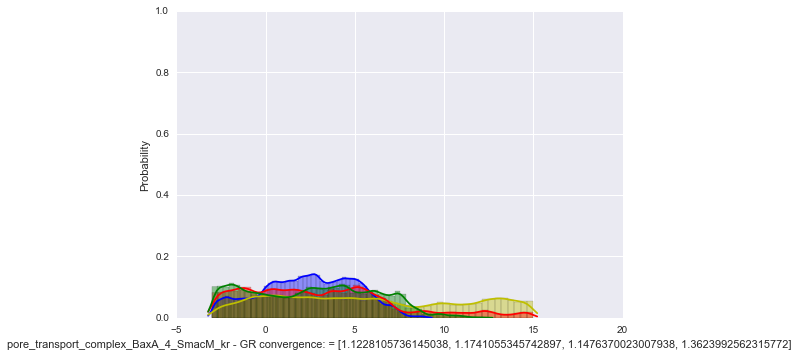

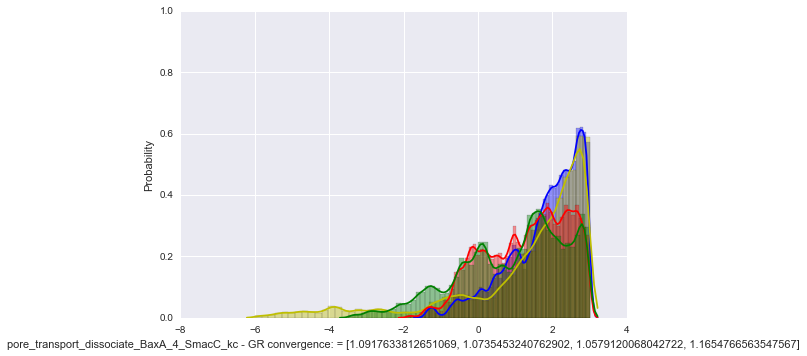

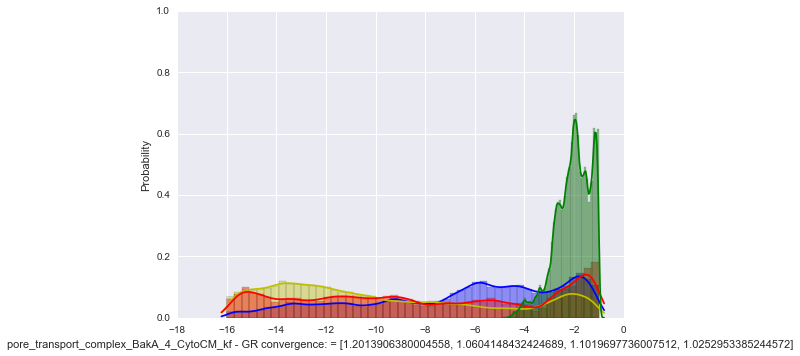

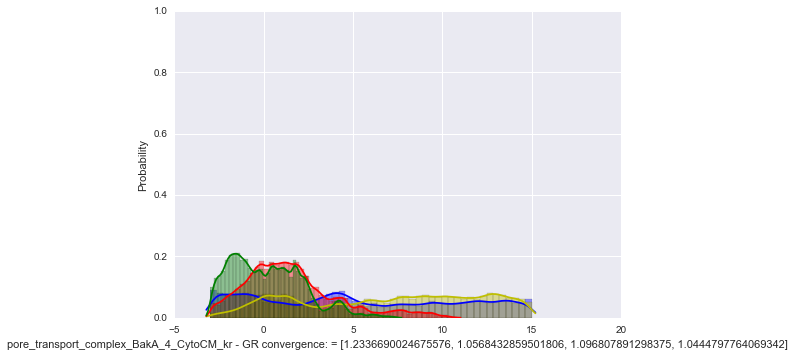

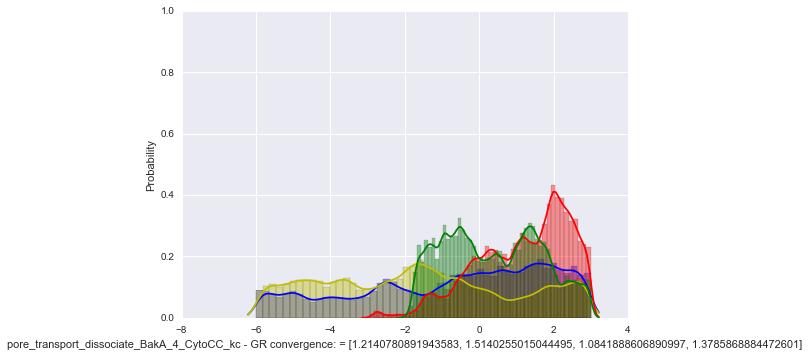

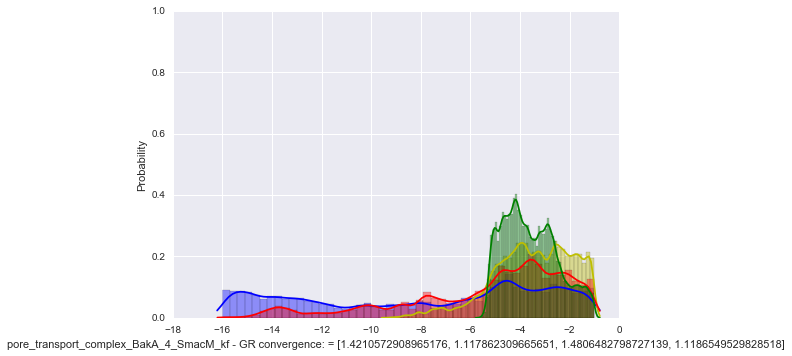

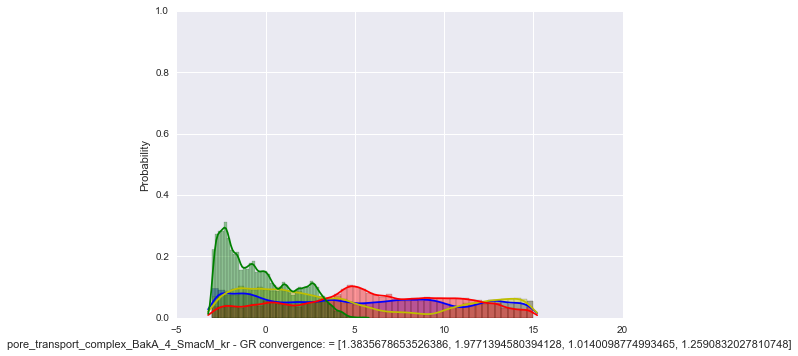

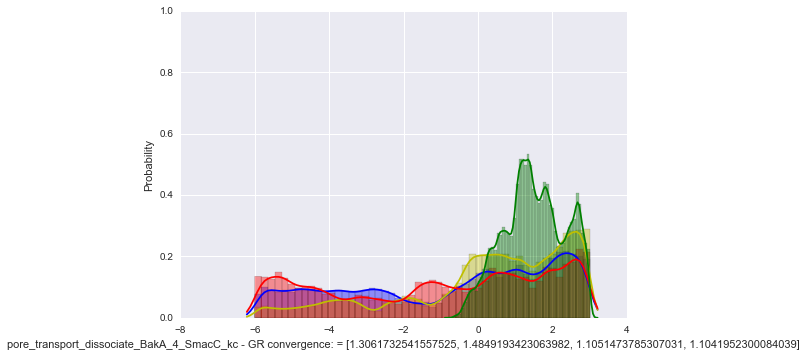

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    ax.set_ylim(0, 1.0)
    convg_summary = [gelman_rubin_dicts[trace][param_name] for trace in ['a', 'b', 'c', 'd']]
    sns.axlabel(param_name+' - GR convergence: = '+str(convg_summary), 'Probability')

In [17]:
traces['a'][1][:,1]

array([ 3.40204384,  3.40204384,  3.40204384, ..., -1.87903538,
       -1.87903538, -1.87903538])

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][0][50000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][1][50000::,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['c'][2][50000:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
os.chdir('/Users/Erin/git/emcee/')
from emcee import autocorr

In [ ]:
range(1, 15+1)

In [ ]:
windows=15
integrated_autocorr_times = {}
for trace in ['a', 'b', 'c']:
    integrated_autocorr_times[trace] = {}
    for chain in range(12):
        integrated_autocorr_times[trace][chain] = np.zeros((windows, 105))
        window_length = int(len(traces[trace][chain][25000::])/windows)
        start = 25000
        for window in range(windows):
            end = start + window_length
            integrated_autocorr_times[trace][chain][window] = autocorr.integrated_time(traces[trace][chain][start:end], window=500)
            start = end
integrated_autocorr_times

In [ ]:
for trace in ['a', 'b', 'c']:
    for chain in range(3):
        for dim in range(105):
            if trace == 'a':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'b')
            elif trace == 'b':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'g')
            elif trace == 'c':
                plt.plot(range(15), integrated_autocorr_times[trace][chain][:,dim], 'y')

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [18]:
acceptance_rates = {}
vector_acceptance_rate = {}
running_acceptance_rates = {}
running_acceptance_rates_100window = {}
n_vector_acceptances = {}
n_100windowvec_acceptances = {}
running_acceptance_rates_vec = {}
running_acceptances_rates_vec_100window = {}
n_100window_acceptances = {}
n_acceptances = {}
for run in ['a', 'b', 'c', 'd']:
    acceptance_rates[run] = {}
    vector_acceptance_rate[run] = {}
    running_acceptance_rates[run] = {}
    running_acceptance_rates_100window[run] = {}
    n_vector_acceptances[run] = {}
    n_100windowvec_acceptances[run] = {}
    running_acceptance_rates_vec[run] = {}
    running_acceptances_rates_vec_100window[run] = {}
    n_100window_acceptances[run] = {}
    n_acceptances[run] = {}
    for chain in range(len(traces[run])):
        acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0],)))
        vector_acceptance_rate[run][chain] = 0
        running_acceptance_rates[run][chain] = np.zeros((len(traces['a'][0][0]), len(traces['a'][0])))
        running_acceptance_rates_100window[run][chain] = np.zeros((len(traces['a'][0][0]), 5500))
        n_vector_acceptances[run][chain] = 0
        n_100windowvec_acceptances[run][chain] = 0
        running_acceptance_rates_vec[run][chain] = np.zeros((1, len(traces['a'][0])))
        running_acceptances_rates_vec_100window[run][chain] = np.zeros((1, 5500))
        n_100window_acceptances[run][chain] = {}
        n_acceptances[run][chain] = {}
        for dim in range(len(traces[run][chain][0])):
            n_100window_acceptances[run][chain][dim] = 0
            n_acceptances[run][chain][dim] = 0
            for iteration in range(1, len(traces[run][chain])):
                if dim == 0:
                    comparison = traces[run][chain][iteration] == traces[run][chain][iteration-1]
                    if not np.all(comparison):
                        n_vector_acceptances[run][chain] += 1
                        n_100windowvec_acceptances[run][chain] += 1
                    running_acceptance_rates_vec[run][chain][0, iteration] = float(n_vector_acceptances[run][chain])/iteration
                    if iteration % 100 == 0:
                        running_acceptances_rates_vec_100window[run][chain][0, iteration/100] = float(n_100windowvec_acceptances[run][chain])/100
                        n_100windowvec_acceptances[run][chain] = 0
                if traces[run][chain][iteration][dim] != traces[run][chain][iteration-1][dim]:
                    n_acceptances[run][chain][dim] += 1
                    n_100window_acceptances[run][chain][dim] += 1
                running_acceptance_rates[run][chain][dim, iteration] = float(n_acceptances[run][chain][dim])/iteration
        
                if iteration % 100 == 0:
                    running_acceptance_rates_100window[run][chain][dim, iteration/100] = float(n_100window_acceptances[run][chain][dim])/100
                    n_100window_acceptances[run][chain][dim] = 0
            
            acceptance_rates[run][chain][dim] = float(n_acceptances[run][chain][dim])/len(traces[run][chain])
            print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances[run][chain][dim]),' acceptance rate: ',str(acceptance_rates[run][chain][dim])
        print 'n vector acceptances: ',n_vector_acceptances[run][chain],' for run: ',run,' and chain: ',chain
        print 'Acceptance rate for vector: ',float(n_vector_acceptances[run][chain])/len(traces[run][chain]),' for run: ',run,' and chain: ',chain
running_acceptance_rates
running_acceptance_rates_100window
running_acceptance_rates_vec
running_acceptances_rates_vec_100window


N acceptances for parameter:  bind_L_R_to_LR_kf  =  26593  acceptance rate:  0.132965
N acceptances for parameter:  bind_L_R_to_LR_kr  =  29168  acceptance rate:  0.14584
N acceptances for parameter:  convert_LR_to_DISC_kc  =  26326  acceptance rate:  0.13163
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  26698  acceptance rate:  0.13349
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  28295  acceptance rate:  0.141475
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  28562  acceptance rate:  0.14281
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  28560  acceptance rate:  0.1428
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  28698  acceptance rate:  0.14349
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  25941  acceptance rate:  0.129705
N acceptances for parameter:  bind_DISC_flip_kf  =  28986  acceptance rate:  0.14493
N acceptances for parameter:  bind_DISC_flip_kr  =  28972  accepta

{'a': {0: array([[ 0.  ,  0.25,  0.13, ...,  0.  ,  0.  ,  0.  ]]),
  1: array([[ 0.  ,  0.16,  0.29, ...,  0.  ,  0.  ,  0.  ]]),
  2: array([[ 0.  ,  0.21,  0.23, ...,  0.  ,  0.  ,  0.  ]])},
 'b': {0: array([[ 0.  ,  0.24,  0.22, ...,  0.  ,  0.  ,  0.  ]]),
  1: array([[ 0.  ,  0.2 ,  0.14, ...,  0.  ,  0.  ,  0.  ]]),
  2: array([[ 0.  ,  0.24,  0.11, ...,  0.  ,  0.  ,  0.  ]])},
 'c': {0: array([[ 0.  ,  0.15,  0.11, ...,  0.  ,  0.  ,  0.  ]]),
  1: array([[ 0.  ,  0.14,  0.12, ...,  0.  ,  0.  ,  0.  ]]),
  2: array([[ 0.  ,  0.15,  0.17, ...,  0.  ,  0.  ,  0.  ]])},
 'd': {0: array([[ 0.  ,  0.23,  0.24, ...,  0.  ,  0.  ,  0.  ]]),
  1: array([[ 0.  ,  0.2 ,  0.12, ...,  0.  ,  0.  ,  0.  ]]),
  2: array([[ 0.  ,  0.23,  0.17, ...,  0.  ,  0.  ,  0.  ]])}}

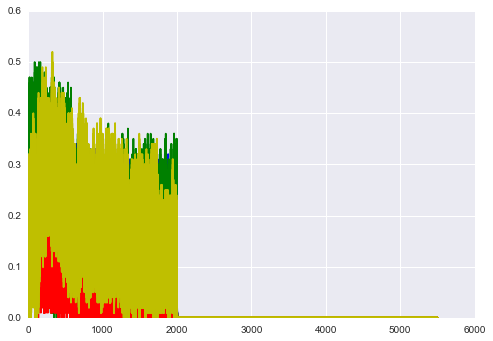

In [19]:
for run in ['a', 'b', 'c', 'd']:
    for chain in range(len(traces[run])):
        for dim in range(105):
            if run == 'a':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'b')
            elif run == 'b':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'g')
            elif run == 'c':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'r')
            elif run == 'd':
                plt.plot(range(5500), running_acceptance_rates_100window[run][chain][dim, :], 'y')

In [ ]:
adapted_crossover_vals = {}
adapted_gamma_vals = {}
joint_probs = {}
for run in ['a', 'b']:
    adapted_gamma_vals[run] = np.load('earm_mtdreamzs_12chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_gammalevelprob.npy')
    adapted_crossover_vals[run] = np.load('earm_mtdreamzs_12chain_uniform_gammalevels_25000burnin_'+run+'_DREAM_chain_adapted_crossoverprob.npy')
    #joint_probs[run] = adapted_crossover_vals[run]*[adapted_gamma_vals[run][level] for level in range(len(adapted_gamma_vals[run]))]


In [ ]:
adapted_crossover_vals

In [ ]:
adapted_gamma_vals